In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Final Data Processing.

In [2]:
df = pd.read_csv('final_data_1_iter.csv') #iterations = 3, nbit = 1024

In [3]:
df

,name,molweight,critical temperature (K),acentric factor,boiling point (K),SMILES,ECFP_Bits
0,(+)-camphene,136.23704,638.00,0.2960,432.65,CC1(C)C2CCC(C2)C1=C,0000000010001000100000100000001001011000000001...
1,(-)-a-pinene,136.23704,647.00,0.3410,429.35,CC1=CC[C@H]2C[C@@H]1C2(C)C,0000000000001000110000100000001001001100000100...
2,(-)-camphene,136.23704,638.00,0.2960,439.95,CC1(C)C2CCC(C2)C1=C,0000000010001000100000100000001001011000000001...
3,"(1,1-dimethylbutyl)benzene",162.27492,697.15,0.4370,478.65,CCCC(C)(C)c1ccccc1,1000000011000000110000100010100001001010000000...
4,(1-butylhexadecyl)benzene,358.65124,851.65,0.7590,693.15,CCCCCCCCCCCCCCCC(CCCC)c1ccccc1,1100000000000000110001100010000001011010100000...
...,...,...,...,...,...,...,...
5895,vinylacetylene,52.07576,454.00,0.1180,278.25,C/C=C/C=C,0000000000001000100000100000000001000000000001...
5896,vinylcyclohexene,108.18328,599.00,0.3290,401.00,CC(C)/C=C/Cl,0100001000000000000100001001000001100000000000...
5897,water,18.01528,647.13,0.3449,373.15,C/C=C/CF,0000000010001000100000010000000001000000000000...
5898,zirconium chloride,233.03480,778.00,0.2980,604.15,C\C(c1ccccc1)=C(\C)c2ccccc2,1000000001000000010000100000000001001001010000...


In [4]:
df.describe()

,molweight,critical temperature (K),acentric factor,boiling point (K)
count,5900.000000,5900.000000,5900.000000,5900.000000
mean,162.792075,650.688900,0.489841,460.435158
std,75.747231,109.978203,0.205024,95.686479
min,16.042760,126.200000,0.010500,77.340000
25%,114.230920,587.155000,0.332000,400.990000
50%,148.181780,639.915000,0.447000,456.150000
75%,182.349440,720.627500,0.645250,513.150000
max,626.327880,1314.000000,1.116000,797.080000


#### Get distribution of the different properties

array([[<AxesSubplot:title={'center':'molweight'}>,
        <AxesSubplot:title={'center':'critical temperature (K)'}>],
       [<AxesSubplot:title={'center':'acentric factor'}>,
        <AxesSubplot:title={'center':'boiling point (K)'}>]], dtype=object)

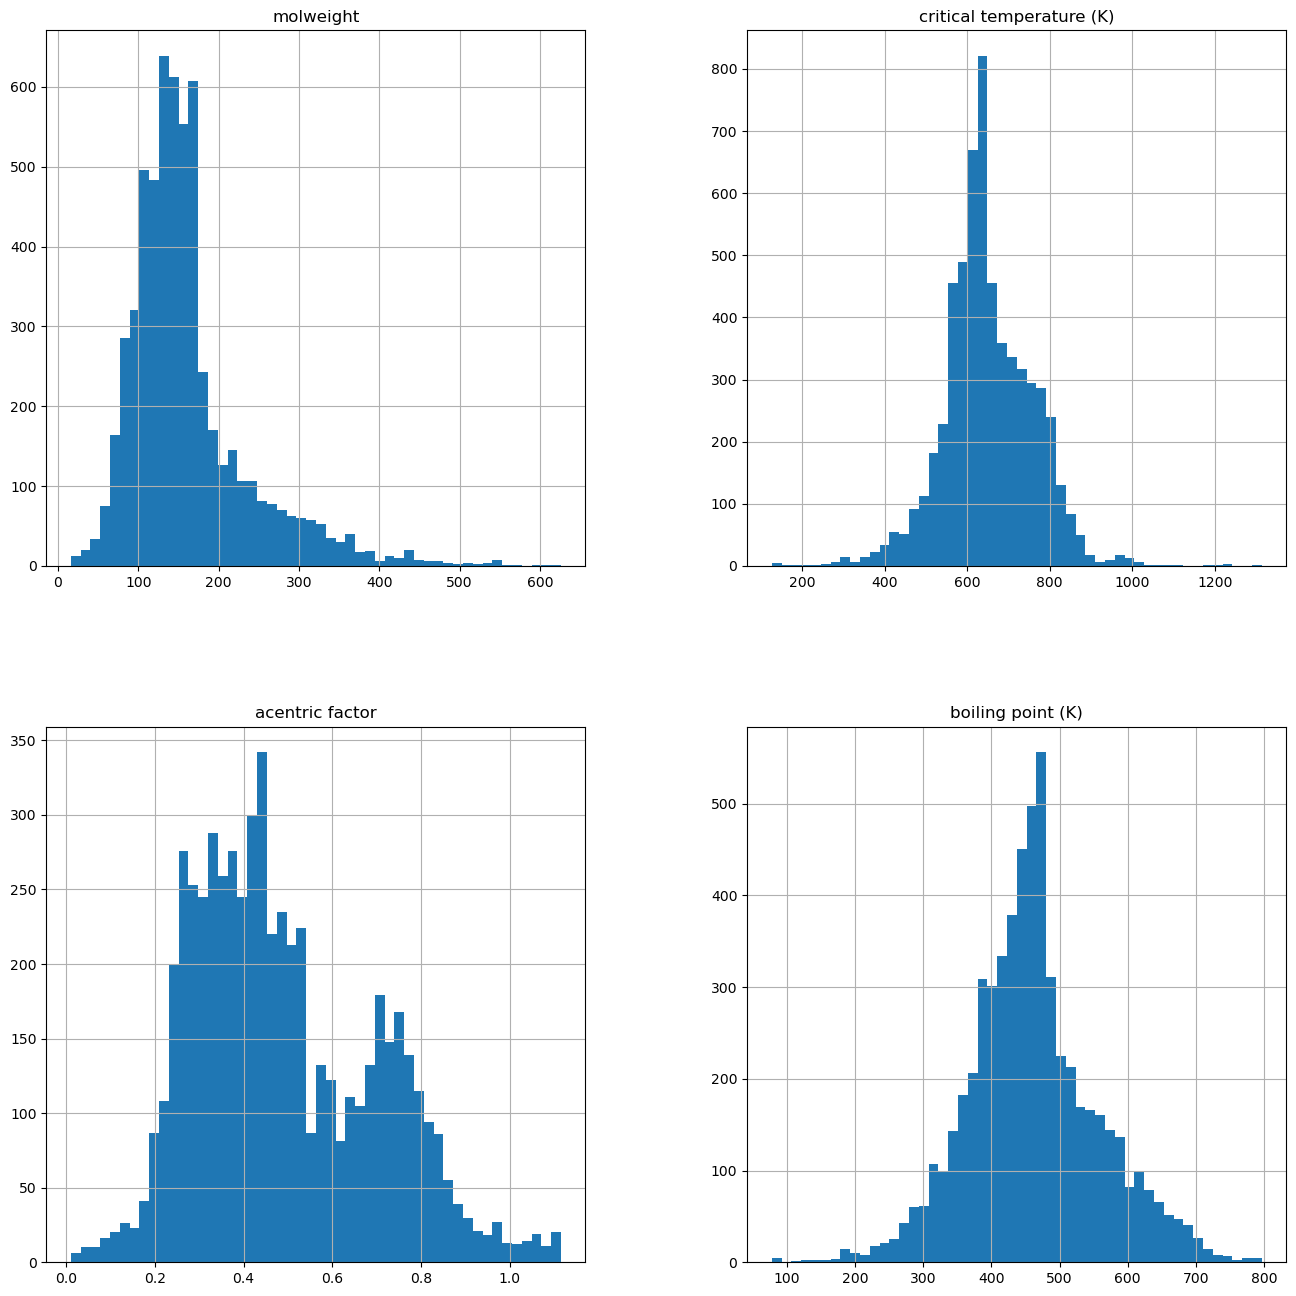

In [5]:
df[['molweight','critical temperature (K)','acentric factor','boiling point (K)']].hist(layout=(2,2),figsize=(16,16),bins=50)

In [6]:
df['ECFP_Bits'].apply(lambda x: len(x)).unique() #Verfiying all bit lengths

array([64], dtype=int64)

In [7]:
ECFP = df['ECFP_Bits'].str.split('',expand=True)

In [8]:
ECFP.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,
1,,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,
2,,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,
3,,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,
4,,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,


In [9]:
ECFP.drop(columns=[0,65],inplace=True)

In [10]:
ECFP.head()

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,1,0,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


The ECFP dataframe can now be seen as Input X.

### Make dataset with molecular weight

In [11]:
ECFP_mol_weight = ECFP.copy(deep=True)
ECFP_mol_weight.insert(0,'MW',df['molweight'])

In [12]:
ECFP_mol_weight.head()

,MW,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,136.23704,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
1,136.23704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,136.23704,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
3,162.27492,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,358.65124,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Normalise Molecular Weight data (using MinMaxScaler())

In [13]:
ECFP_mol_weight['MW'] = (ECFP_mol_weight['MW']-ECFP_mol_weight['MW'].min())/(ECFP_mol_weight['MW'].max()-ECFP_mol_weight['MW'].min())

In [14]:
ECFP_mol_weight.head()

,MW,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.196948,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
1,0.196948,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0.196948,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
3,0.239613,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.561391,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## 2. Example 1: Using an ANN as a multi-output regression model. Using just ECFP

#### Neural Network Structure Used:
<br>**2 layer network** with dimensions: [64,3]
<br>**Activation Functions**: All Relu as an intial trial
<br>**Loss Function**: Mean Squared Error
<br>**Optimiser**: Adam
<br>**Epochs**: to be determined

In [15]:
#pip install -U scikit-learn

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
y_cols = ['critical temperature (K)','acentric factor','boiling point (K)']

In [18]:
X = ECFP.astype(float); y= df[y_cols].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Number of hidden units for each layer are given in parameter "layer_dims"

In [19]:
model = Sequential()
model.add(Dense(64,input_shape=(64,),activation='relu'))
model.add(Dense(3,activation='relu'))

In [20]:
model.compile(loss='mse',optimizer='adam')

In [21]:
X_train.dtypes

1     float64
2     float64
3     float64
4     float64
5     float64
       ...   
60    float64
61    float64
62    float64
63    float64
64    float64
Length: 64, dtype: object

In [22]:
model.fit(X_train,y_train,epochs = 300)

Epoch 1/300
148/148 [==============================] - 2s 2ms/step - loss: 212965.6719
Epoch 2/300
148/148 [==============================] - 0s 2ms/step - loss: 182391.9531
Epoch 3/300
148/148 [==============================] - 0s 2ms/step - loss: 128725.7500
Epoch 4/300
148/148 [==============================] - 0s 2ms/step - loss: 74508.5938
Epoch 5/300
148/148 [==============================] - 0s 2ms/step - loss: 39287.3398
Epoch 6/300
148/148 [==============================] - 0s 2ms/step - loss: 24200.9668
Epoch 7/300
148/148 [==============================] - 0s 2ms/step - loss: 19505.4492
Epoch 8/300
148/148 [==============================] - 0s 2ms/step - loss: 18077.0234
Epoch 9/300
148/148 [==============================] - 0s 2ms/step - loss: 17424.6602
Epoch 10/300
148/148 [==============================] - 0s 2ms/step - loss: 16970.5000
Epoch 11/300
148/148 [==============================] - 0s 2ms/step - loss: 16580.0469
Epoch 12/300
148/148 [===========================

148/148 [==============================] - 0s 2ms/step - loss: 6714.3135
Epoch 96/300
148/148 [==============================] - 0s 2ms/step - loss: 6710.3862
Epoch 97/300
148/148 [==============================] - 0s 2ms/step - loss: 6701.4712
Epoch 98/300
148/148 [==============================] - 0s 2ms/step - loss: 6695.9370
Epoch 99/300
148/148 [==============================] - 0s 2ms/step - loss: 6697.7080
Epoch 100/300
148/148 [==============================] - 0s 2ms/step - loss: 6685.8618
Epoch 101/300
148/148 [==============================] - 0s 2ms/step - loss: 6684.3809
Epoch 102/300
148/148 [==============================] - 0s 2ms/step - loss: 6682.5693
Epoch 103/300
148/148 [==============================] - 0s 2ms/step - loss: 6680.3384
Epoch 104/300
148/148 [==============================] - 0s 2ms/step - loss: 6680.2490
Epoch 105/300
148/148 [==============================] - 0s 2ms/step - loss: 6668.2603
Epoch 106/300
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 6452.6172
Epoch 190/300
148/148 [==============================] - 0s 2ms/step - loss: 6453.0488
Epoch 191/300
148/148 [==============================] - 0s 2ms/step - loss: 6447.2646
Epoch 192/300
148/148 [==============================] - 0s 2ms/step - loss: 6446.0474
Epoch 193/300
148/148 [==============================] - 0s 2ms/step - loss: 6444.5396
Epoch 194/300
148/148 [==============================] - 0s 2ms/step - loss: 6440.5645
Epoch 195/300
148/148 [==============================] - 0s 2ms/step - loss: 6439.2197
Epoch 196/300
148/148 [==============================] - 0s 2ms/step - loss: 6439.1729
Epoch 197/300
148/148 [==============================] - 0s 2ms/step - loss: 6436.6821
Epoch 198/300
148/148 [==============================] - 0s 2ms/step - loss: 6432.6079
Epoch 199/300
148/148 [==============================] - 0s 2ms/step - loss: 6432.8203
Epoch 200/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6277.7422
Epoch 284/300
148/148 [==============================] - 0s 2ms/step - loss: 6283.9639
Epoch 285/300
148/148 [==============================] - 0s 2ms/step - loss: 6276.2822
Epoch 286/300
148/148 [==============================] - 0s 2ms/step - loss: 6279.7202
Epoch 287/300
148/148 [==============================] - 0s 2ms/step - loss: 6279.8979
Epoch 288/300
148/148 [==============================] - 0s 2ms/step - loss: 6280.8823
Epoch 289/300
148/148 [==============================] - 0s 2ms/step - loss: 6275.1929
Epoch 290/300
148/148 [==============================] - 0s 2ms/step - loss: 6265.6680
Epoch 291/300
148/148 [==============================] - 0s 2ms/step - loss: 6266.4424
Epoch 292/300
148/148 [==============================] - 0s 2ms/step - loss: 6264.7324
Epoch 293/300
148/148 [==============================] - 0s 2ms/step - loss: 6269.9824
Epoch 294/300
148/148 [==============================] - 

In [23]:
model.evaluate(X_test,y_test)

37/37 [==============================] - 1s 2ms/step - loss: 6517.1782


6517.17822265625

#### Evaluate Model for example 1 with K-fold cross validation

In [24]:
#THIS LINE TAKES A WHILE TO RUN!
"""
from sklearn.model_selection import RepeatedKFold

def get_model_example1():
    model = Sequential()
    
    model.add(Dense(512,input_shape=(1024,),activation='relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3,activation='relu'))
    
    model.compile(loss='mse',optimizer='adam')
    return model

def evaluate_model(X,y):
    results=list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    cv = RepeatedKFold(n_splits=10, n_repeats=3)
    
    for train_ix, test_ix in cv.split(X):
		# prepare data
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        #Get and fit Model 
        model=get_model_example1()
        model.fit(X_train,y_train,epochs = 150)
        mae = model.evaluate(X_test,y_test,verbose = 0)
        print(mse)
        results.append(mse)
    return results

results = evaluate_model(X,y)
"""

"\nfrom sklearn.model_selection import RepeatedKFold\n\ndef get_model_example1():\n    model = Sequential()\n    \n    model.add(Dense(512,input_shape=(1024,),activation='relu'))\n    model.add(Dense(256, activation = 'relu'))\n    model.add(Dense(64, activation='relu'))\n    model.add(Dense(3,activation='relu'))\n    \n    model.compile(loss='mse',optimizer='adam')\n    return model\n\ndef evaluate_model(X,y):\n    results=list()\n    n_inputs, n_outputs = X.shape[1], y.shape[1]\n    cv = RepeatedKFold(n_splits=10, n_repeats=3)\n    \n    for train_ix, test_ix in cv.split(X):\n\t\t# prepare data\n        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]\n        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]\n        #Get and fit Model \n        model=get_model_example1()\n        model.fit(X_train,y_train,epochs = 150)\n        mae = model.evaluate(X_test,y_test,verbose = 0)\n        print(mse)\n        results.append(mse)\n    return results\n\nresults = evaluate_model(X,y)\n

#### Evaluating Model using Percentage Error

In [25]:
predictions = model.predict(X_test)

In [26]:
predictions[:5]

array([[6.5753339e+02, 4.2087203e-01, 4.7307437e+02],
       [6.4942346e+02, 5.0209165e-01, 4.5227045e+02],
       [6.8267206e+02, 4.4992921e-01, 4.8427405e+02],
       [6.3821460e+02, 3.9923280e-01, 4.4677701e+02],
       [6.3940717e+02, 4.6506080e-01, 4.5604175e+02]], dtype=float32)

In [27]:
predictions_df = pd.DataFrame(predictions,columns=y_cols)

In [28]:
predictions_df

,critical temperature (K),acentric factor,boiling point (K)
0,657.533386,0.420872,473.074371
1,649.423462,0.502092,452.270447
2,682.672058,0.449929,484.274048
3,638.214600,0.399233,446.777008
4,639.407166,0.465061,456.041748
...,...,...,...
1175,628.467773,0.325879,438.239838
1176,654.664978,0.355961,461.982666
1177,655.872375,0.482672,466.069183
1178,618.698242,0.375989,435.332184


In [29]:
predictions_df.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,650.200073,0.419092,460.531036
std,32.002037,0.051231,25.330187
min,566.429138,0.264307,386.557159
25%,629.668533,0.384679,444.596085
50%,646.483704,0.422321,458.684540
75%,666.734741,0.453384,474.571167
max,809.842896,0.589044,585.943909


In [30]:
y_test.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,653.588407,0.495446,463.329602
std,109.303454,0.207081,95.339694
min,132.920000,0.032000,81.700000
25%,586.075000,0.331750,403.150000
50%,639.875000,0.449000,455.000000
75%,724.287500,0.663000,517.977500
max,1216.860000,1.111000,793.150000


It looks like predictions for Critical Temperature and boiling point are somewhat okay (possibly after experimenting with hyperparameters, the performance of the ANN might be better). But the model is useless at predicting acentric factor (it is guessing every value as 0).

Multi-ouput ANN is not effective. Deal with them 1 by 1.

Now for Critical Temperature & Boiling point, calculate %errors

In [31]:
perc_errors = np.abs((y_test-predictions)/y_test)*100

In [32]:
perc_errors.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,13.111095,39.639999,16.575659
std,17.794561,68.261038,22.339467
min,0.004684,0.052470,0.008228
25%,4.355040,14.427019,4.857448
50%,9.948801,31.003285,12.278319
75%,16.881713,46.017555,21.629862
max,407.609723,1321.028469,486.192137


### 2.1 Testing different numbers of Epochs

In [34]:
loss_func = 'mse'
epochs_trial = [10,25,50,100,150,200,300]
history_list = []
for epoch in epochs_trial:
    model = Sequential()
    model.add(Dense(63,input_shape=(64,),activation='relu'))
    model.add(Dense(3,activation='relu'))
    
    model.compile(loss=loss_func,optimizer='adam')
    
    history = model.fit(X_train,y_train,epochs = epoch)
    
    eval_val = model.evaluate(X_test,y_test)
    history_list.append([history, eval_val])

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 214352.8594
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 186433.5312
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 133022.8438
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 78671.2188
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 42836.7500
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 26554.3906
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 20731.9805
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 18688.6816
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 17856.4844
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 19091.0605
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 213405.7812
Epoch 2/25
148/148 [==============================] - 0s 2ms/s

148/148 [==============================] - 0s 2ms/step - loss: 17717.5020
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 17297.2266
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 16965.9238
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 16665.6191
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 16392.2578
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 16134.4375
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 15881.3594
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 15631.2949
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 15393.0098
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 15160.7881
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 14931.7646
Epoch 20/100
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 131394.3906
Epoch 4/150
148/148 [==============================] - 0s 2ms/step - loss: 77352.5938
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 42162.2266
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 26032.3613
Epoch 7/150
148/148 [==============================] - 0s 2ms/step - loss: 20191.2832
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 18360.2461
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 17672.9121
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 17272.9492
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 16943.5352
Epoch 12/150
148/148 [==============================] - 0s 2ms/step - loss: 16644.3145
Epoch 13/150
148/148 [==============================] - 0s 2ms/step - loss: 16354.2051
Epoch 14/150
148/148 [==============================] - 0s 2m

Epoch 98/150
148/148 [==============================] - 0s 2ms/step - loss: 6768.5327
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 6765.9170
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 6758.0815
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 6756.6631
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 6747.6562
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 6744.1123
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 6741.6353
Epoch 105/150
148/148 [==============================] - 0s 2ms/step - loss: 6737.8281
Epoch 106/150
148/148 [==============================] - 0s 2ms/step - loss: 6732.3926
Epoch 107/150
148/148 [==============================] - 0s 2ms/step - loss: 6729.9541
Epoch 108/150
148/148 [==============================] - 0s 2ms/step - loss: 6723.8013
Epoch 109/150
148/148 [======================

148/148 [==============================] - 0s 2ms/step - loss: 10615.7725
Epoch 42/200
148/148 [==============================] - 0s 2ms/step - loss: 10453.1045
Epoch 43/200
148/148 [==============================] - 0s 2ms/step - loss: 10289.3105
Epoch 44/200
148/148 [==============================] - 0s 2ms/step - loss: 10131.9043
Epoch 45/200
148/148 [==============================] - 0s 2ms/step - loss: 9971.6240
Epoch 46/200
148/148 [==============================] - 0s 2ms/step - loss: 9813.7227
Epoch 47/200
148/148 [==============================] - 0s 2ms/step - loss: 9661.8301
Epoch 48/200
148/148 [==============================] - 0s 2ms/step - loss: 9519.8662
Epoch 49/200
148/148 [==============================] - 0s 2ms/step - loss: 9357.1729
Epoch 50/200
148/148 [==============================] - 0s 2ms/step - loss: 9213.3242
Epoch 51/200
148/148 [==============================] - 0s 2ms/step - loss: 9076.1611
Epoch 52/200
148/148 [==============================] - 0s 2ms/

Epoch 136/200
148/148 [==============================] - 0s 2ms/step - loss: 6656.1011
Epoch 137/200
148/148 [==============================] - 0s 2ms/step - loss: 6652.5488
Epoch 138/200
148/148 [==============================] - 0s 2ms/step - loss: 6648.1094
Epoch 139/200
148/148 [==============================] - 0s 2ms/step - loss: 6640.8569
Epoch 140/200
148/148 [==============================] - 0s 2ms/step - loss: 6641.8311
Epoch 141/200
148/148 [==============================] - 0s 2ms/step - loss: 6641.1826
Epoch 142/200
148/148 [==============================] - 0s 2ms/step - loss: 6635.6138
Epoch 143/200
148/148 [==============================] - 0s 2ms/step - loss: 6636.7300
Epoch 144/200
148/148 [==============================] - 0s 2ms/step - loss: 6637.3350
Epoch 145/200
148/148 [==============================] - 0s 2ms/step - loss: 6629.2920
Epoch 146/200
148/148 [==============================] - 0s 2ms/step - loss: 6628.0073
Epoch 147/200
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 12891.6318
Epoch 30/300
148/148 [==============================] - 0s 2ms/step - loss: 12710.9785
Epoch 31/300
148/148 [==============================] - 0s 2ms/step - loss: 12528.9873
Epoch 32/300
148/148 [==============================] - 0s 2ms/step - loss: 12341.3525
Epoch 33/300
148/148 [==============================] - 0s 2ms/step - loss: 12159.2441
Epoch 34/300
148/148 [==============================] - 0s 2ms/step - loss: 11980.4229
Epoch 35/300
148/148 [==============================] - 0s 2ms/step - loss: 11793.1172
Epoch 36/300
148/148 [==============================] - 0s 2ms/step - loss: 11610.7529
Epoch 37/300
148/148 [==============================] - 0s 2ms/step - loss: 11426.4131
Epoch 38/300
148/148 [==============================] - 0s 2ms/step - loss: 11244.1279
Epoch 39/300
148/148 [==============================] - 0s 2ms/step - loss: 11059.7041
Epoch 40/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6678.7051
Epoch 124/300
148/148 [==============================] - 0s 2ms/step - loss: 6676.1362
Epoch 125/300
148/148 [==============================] - 0s 2ms/step - loss: 6673.8599
Epoch 126/300
148/148 [==============================] - 0s 2ms/step - loss: 6678.5117
Epoch 127/300
148/148 [==============================] - 0s 2ms/step - loss: 6672.3628
Epoch 128/300
148/148 [==============================] - 0s 2ms/step - loss: 6665.8384
Epoch 129/300
148/148 [==============================] - 0s 2ms/step - loss: 6669.8711
Epoch 130/300
148/148 [==============================] - 0s 2ms/step - loss: 6666.6357
Epoch 131/300
148/148 [==============================] - 0s 2ms/step - loss: 6665.1343
Epoch 132/300
148/148 [==============================] - 0s 2ms/step - loss: 6661.8896
Epoch 133/300
148/148 [==============================] - 0s 2ms/step - loss: 6663.2578
Epoch 134/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6530.9238
Epoch 218/300
148/148 [==============================] - 0s 2ms/step - loss: 6529.3242
Epoch 219/300
148/148 [==============================] - 0s 2ms/step - loss: 6522.9370
Epoch 220/300
148/148 [==============================] - 0s 2ms/step - loss: 6530.0103
Epoch 221/300
148/148 [==============================] - 0s 2ms/step - loss: 6526.5552
Epoch 222/300
148/148 [==============================] - 0s 2ms/step - loss: 6522.5557
Epoch 223/300
148/148 [==============================] - 0s 2ms/step - loss: 6517.6836
Epoch 224/300
148/148 [==============================] - 0s 2ms/step - loss: 6523.7549
Epoch 225/300
148/148 [==============================] - 0s 2ms/step - loss: 6520.8716
Epoch 226/300
148/148 [==============================] - 0s 2ms/step - loss: 6519.8472
Epoch 227/300
148/148 [==============================] - 0s 2ms/step - loss: 6514.4966
Epoch 228/300
148/148 [==============================] - 

In [35]:
history_list

[[<tensorflow.python.keras.callbacks.History at 0x141cf850b50>,
  19091.060546875],
  15443.55078125],
  9341.9013671875],
  6875.818359375],
  6738.45263671875],
  6694.54541015625],
  6680.755859375]]

In [36]:
training_loss = [x[0].history['loss'][-1] for x in history_list] #Training losses at final epoch
test_loss = [x[1] for x in history_list]

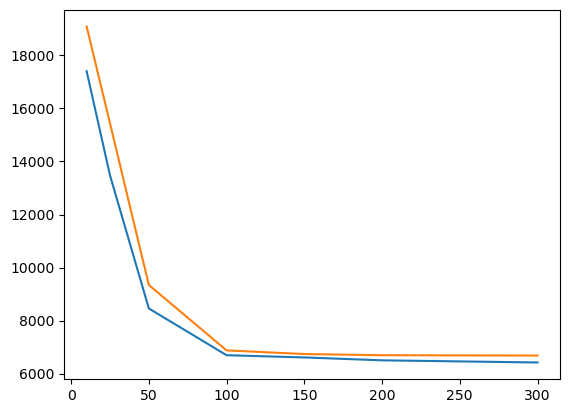

In [37]:
plt.plot(epochs_trial,training_loss, label='Training Losses')
plt.plot(epochs_trial,test_loss, label='Test Losses')

## 3. Example 2: ANN with ECFP and Molecular Weight data.

Used same ANN structure as Example 1

In [38]:
def get_model_example2():
    model = Sequential()
    model.add(Dense(32,input_shape=(65,),activation='relu'))
    model.add(Dense(3,activation='relu'))

    model.compile(loss='mse',optimizer='adam')
    return model

In [39]:
X_mol = ECFP_mol_weight.astype(float); y_mol= df[y_cols].astype(float)
X_mol_train, X_mol_test, y_mol_train, y_mol_test = train_test_split(X_mol, y_mol, test_size=0.20)

In [40]:
model_example2 = get_model_example2()
model_example2.fit(X_mol_train,y_mol_train,epochs=150)

Epoch 1/150
148/148 [==============================] - 1s 2ms/step - loss: 216179.7812
Epoch 2/150
148/148 [==============================] - 0s 2ms/step - loss: 202938.9062
Epoch 3/150
148/148 [==============================] - 0s 2ms/step - loss: 176930.8438
Epoch 4/150
148/148 [==============================] - 0s 2ms/step - loss: 142153.7812
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 104292.1875
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 71214.9219
Epoch 7/150
148/148 [==============================] - 0s 2ms/step - loss: 45867.3320
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 30517.8945
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 23028.5977
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 19595.2598
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 17987.1543
Epoch 12/150
148/148 [=========================

148/148 [==============================] - 0s 2ms/step - loss: 3298.6426
Epoch 96/150
148/148 [==============================] - 0s 2ms/step - loss: 3297.1401
Epoch 97/150
148/148 [==============================] - 0s 2ms/step - loss: 3291.9194
Epoch 98/150
148/148 [==============================] - 0s 2ms/step - loss: 3294.6042
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 3289.6980
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 3287.5496
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 3286.8662
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 3284.6934
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 3282.7334
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 3281.6941
Epoch 105/150
148/148 [==============================] - 0s 2ms/step - loss: 3279.8826
Epoch 106/150
148/148 [==============================] - 0s 2

In [41]:
model_example2.evaluate(X_mol_test,y_mol_test)

37/37 [==============================] - 0s 2ms/step - loss: 3123.1423


3123.142333984375

##### Adding the molecular weight seems to have helped performance by a significant margin!

Try Different Numbers of Epochs (graphing out testing set loss)

In [42]:
epochs_mol = [10,25,50,100,150,250,300,350,400,500,600,700]

In [43]:
test_loss = []
predictions_mol = []

for epoch in epochs_mol:
    model=get_model_example2()
    model.fit(X_mol_train,y_mol_train,epochs=epoch)
    evaluation = model.evaluate(X_mol_test,y_mol_test)
    predictions = model.predict(X_mol_test)
    
    test_loss.append(evaluation)
    predictions_mol.append(predictions)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 214869.0156
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 195873.5938
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 162143.1406
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 120575.3047
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 81208.9688
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 50889.6523
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 32402.6738
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 23482.8066
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 19695.7676
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 16880.9961
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 216015.2656
Epoch 2/25
148/148 [==============================] - 0s 2ms/

148/148 [==============================] - 0s 2ms/step - loss: 18915.2500
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 17587.0879
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 16980.0879
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 16591.5020
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 16265.9238
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 15964.3818
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 15671.6426
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 15386.4424
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 15109.1055
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 14839.1318
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 14575.6797
Epoch 20/100
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 174150.9531
Epoch 4/150
148/148 [==============================] - 0s 2ms/step - loss: 139279.2500
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 103632.8672
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 72571.3359
Epoch 7/150
148/148 [==============================] - 0s 2ms/step - loss: 49013.4141
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 32627.8027
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 23848.4473
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 19990.0684
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 18298.8203
Epoch 12/150
148/148 [==============================] - 0s 2ms/step - loss: 17464.4805
Epoch 13/150
148/148 [==============================] - 0s 2ms/step - loss: 16988.9219
Epoch 14/150
148/148 [==============================] - 0s 

Epoch 98/150
148/148 [==============================] - 0s 2ms/step - loss: 3316.3958
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 3313.2808
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 3309.7656
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 3305.9812
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 3307.0884
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 3305.2161
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 3303.3425
Epoch 105/150
148/148 [==============================] - 0s 2ms/step - loss: 3302.9558
Epoch 106/150
148/148 [==============================] - 0s 2ms/step - loss: 3299.6887
Epoch 107/150
148/148 [==============================] - 0s 2ms/step - loss: 3298.3608
Epoch 108/150
148/148 [==============================] - 0s 2ms/step - loss: 3297.2795
Epoch 109/150
148/148 [======================

148/148 [==============================] - 0s 2ms/step - loss: 80030.4297
Epoch 42/250
148/148 [==============================] - 0s 2ms/step - loss: 79868.8438
Epoch 43/250
148/148 [==============================] - 0s 2ms/step - loss: 79710.0312
Epoch 44/250
148/148 [==============================] - 0s 2ms/step - loss: 79547.3438
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 79384.6328
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 79228.5078
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 79069.8906
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 78913.1250
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 78763.0859
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 78611.1016
Epoch 51/250
148/148 [==============================] - 0s 2ms/step - loss: 78463.5078
Epoch 52/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 75699.2109
Epoch 135/250
148/148 [==============================] - 0s 2ms/step - loss: 75698.6797
Epoch 136/250
148/148 [==============================] - 1s 4ms/step - loss: 75697.4453
Epoch 137/250
148/148 [==============================] - 0s 2ms/step - loss: 75698.3047
Epoch 138/250
148/148 [==============================] - 0s 2ms/step - loss: 75696.7656
Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 75697.7656
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 75699.3516
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 75695.5703
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 75696.4922
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 75694.7422
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 75697.1641
Epoch 145/250
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 75681.3672
Epoch 228/250
148/148 [==============================] - 0s 2ms/step - loss: 75678.1641
Epoch 229/250
148/148 [==============================] - 0s 2ms/step - loss: 75679.1953
Epoch 230/250
148/148 [==============================] - 0s 2ms/step - loss: 75678.7734
Epoch 231/250
148/148 [==============================] - 0s 2ms/step - loss: 75677.3594
Epoch 232/250
148/148 [==============================] - 0s 2ms/step - loss: 75678.8984
Epoch 233/250
148/148 [==============================] - 0s 2ms/step - loss: 75678.5391
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 75676.7812
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 75675.7891
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 75679.2422
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 75677.5234
Epoch 238/250
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 4131.2949
Epoch 71/300
148/148 [==============================] - 0s 2ms/step - loss: 4031.4526
Epoch 72/300
148/148 [==============================] - 0s 2ms/step - loss: 3939.5166
Epoch 73/300
148/148 [==============================] - 0s 2ms/step - loss: 3860.3601
Epoch 74/300
148/148 [==============================] - 0s 2ms/step - loss: 3782.5808
Epoch 75/300
148/148 [==============================] - 0s 2ms/step - loss: 3719.2690
Epoch 76/300
148/148 [==============================] - 0s 2ms/step - loss: 3659.2092
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 3608.4453
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 3566.7954
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 3526.2683
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 3491.5798
Epoch 81/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3285.2844
Epoch 165/300
148/148 [==============================] - 0s 2ms/step - loss: 3284.1721
Epoch 166/300
148/148 [==============================] - 0s 2ms/step - loss: 3286.0962
Epoch 167/300
148/148 [==============================] - 0s 2ms/step - loss: 3285.0364
Epoch 168/300
148/148 [==============================] - 0s 2ms/step - loss: 3287.4338
Epoch 169/300
148/148 [==============================] - 0s 2ms/step - loss: 3285.1843
Epoch 170/300
148/148 [==============================] - 0s 2ms/step - loss: 3285.2224
Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 3283.4944
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 3281.1624
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 3283.8621
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 3285.4578
Epoch 175/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3226.1306
Epoch 259/300
148/148 [==============================] - 0s 2ms/step - loss: 3225.7214
Epoch 260/300
148/148 [==============================] - 0s 2ms/step - loss: 3224.2258
Epoch 261/300
148/148 [==============================] - 0s 2ms/step - loss: 3223.2651
Epoch 262/300
148/148 [==============================] - 0s 2ms/step - loss: 3219.7036
Epoch 263/300
148/148 [==============================] - 0s 3ms/step - loss: 3219.4314
Epoch 264/300
148/148 [==============================] - 0s 2ms/step - loss: 3222.3599
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 3220.6523
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 3217.4846
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 3216.2949
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 3216.7329
Epoch 269/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 7119.7583
Epoch 52/350
148/148 [==============================] - 0s 2ms/step - loss: 6901.8940
Epoch 53/350
148/148 [==============================] - 0s 2ms/step - loss: 6685.6719
Epoch 54/350
148/148 [==============================] - 0s 2ms/step - loss: 6479.4395
Epoch 55/350
148/148 [==============================] - 0s 2ms/step - loss: 6275.0713
Epoch 56/350
148/148 [==============================] - 0s 2ms/step - loss: 6076.1943
Epoch 57/350
148/148 [==============================] - 0s 2ms/step - loss: 5888.9307
Epoch 58/350
148/148 [==============================] - 0s 2ms/step - loss: 5696.3535
Epoch 59/350
148/148 [==============================] - 0s 2ms/step - loss: 5509.2344
Epoch 60/350
148/148 [==============================] - 0s 2ms/step - loss: 5325.3262
Epoch 61/350
148/148 [==============================] - 0s 2ms/step - loss: 5150.9336
Epoch 62/350
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3263.5562
Epoch 146/350
148/148 [==============================] - 0s 2ms/step - loss: 3264.5869
Epoch 147/350
148/148 [==============================] - 0s 2ms/step - loss: 3263.7351
Epoch 148/350
148/148 [==============================] - 0s 2ms/step - loss: 3259.6536
Epoch 149/350
148/148 [==============================] - 0s 2ms/step - loss: 3259.0007
Epoch 150/350
148/148 [==============================] - 0s 2ms/step - loss: 3259.1665
Epoch 151/350
148/148 [==============================] - 0s 2ms/step - loss: 3259.5850
Epoch 152/350
148/148 [==============================] - 0s 2ms/step - loss: 3259.4448
Epoch 153/350
148/148 [==============================] - 0s 2ms/step - loss: 3255.4978
Epoch 154/350
148/148 [==============================] - 0s 2ms/step - loss: 3256.8237
Epoch 155/350
148/148 [==============================] - 0s 2ms/step - loss: 3257.5051
Epoch 156/350
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3201.3799
Epoch 240/350
148/148 [==============================] - 0s 2ms/step - loss: 3199.6643
Epoch 241/350
148/148 [==============================] - 0s 2ms/step - loss: 3198.4111
Epoch 242/350
148/148 [==============================] - 0s 2ms/step - loss: 3199.3940
Epoch 243/350
148/148 [==============================] - 0s 2ms/step - loss: 3194.8296
Epoch 244/350
148/148 [==============================] - 0s 2ms/step - loss: 3197.8320
Epoch 245/350
148/148 [==============================] - 0s 2ms/step - loss: 3194.7402
Epoch 246/350
148/148 [==============================] - 0s 2ms/step - loss: 3194.7800
Epoch 247/350
148/148 [==============================] - 0s 2ms/step - loss: 3193.1890
Epoch 248/350
148/148 [==============================] - 0s 2ms/step - loss: 3194.3381
Epoch 249/350
148/148 [==============================] - 0s 2ms/step - loss: 3194.4944
Epoch 250/350
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3100.5674
Epoch 334/350
148/148 [==============================] - 0s 2ms/step - loss: 3102.2339
Epoch 335/350
148/148 [==============================] - 0s 2ms/step - loss: 3096.9839
Epoch 336/350
148/148 [==============================] - 0s 2ms/step - loss: 3096.7495
Epoch 337/350
148/148 [==============================] - 0s 2ms/step - loss: 3093.5454
Epoch 338/350
148/148 [==============================] - 0s 2ms/step - loss: 3094.4609
Epoch 339/350
148/148 [==============================] - 0s 2ms/step - loss: 3092.2910
Epoch 340/350
148/148 [==============================] - 0s 2ms/step - loss: 3091.7395
Epoch 341/350
148/148 [==============================] - 0s 2ms/step - loss: 3089.5498
Epoch 342/350
148/148 [==============================] - 0s 2ms/step - loss: 3087.4727
Epoch 343/350
148/148 [==============================] - 0s 2ms/step - loss: 3089.6904
Epoch 344/350
148/148 [==============================] - 

Epoch 77/400
148/148 [==============================] - 0s 2ms/step - loss: 3605.8433
Epoch 78/400
148/148 [==============================] - 0s 2ms/step - loss: 3564.3901
Epoch 79/400
148/148 [==============================] - 0s 2ms/step - loss: 3520.2529
Epoch 80/400
148/148 [==============================] - 0s 2ms/step - loss: 3489.3132
Epoch 81/400
148/148 [==============================] - 0s 2ms/step - loss: 3458.3516
Epoch 82/400
148/148 [==============================] - 0s 2ms/step - loss: 3433.8887
Epoch 83/400
148/148 [==============================] - 0s 2ms/step - loss: 3410.8252
Epoch 84/400
148/148 [==============================] - 0s 2ms/step - loss: 3396.5613
Epoch 85/400
148/148 [==============================] - 0s 2ms/step - loss: 3382.0859
Epoch 86/400
148/148 [==============================] - 0s 2ms/step - loss: 3367.8416
Epoch 87/400
148/148 [==============================] - 0s 2ms/step - loss: 3357.8694
Epoch 88/400
148/148 [==============================] 

148/148 [==============================] - 0s 2ms/step - loss: 3208.2844
Epoch 172/400
148/148 [==============================] - 0s 2ms/step - loss: 3204.1526
Epoch 173/400
148/148 [==============================] - 0s 2ms/step - loss: 3202.1917
Epoch 174/400
148/148 [==============================] - 0s 2ms/step - loss: 3201.3569
Epoch 175/400
148/148 [==============================] - 0s 2ms/step - loss: 3200.2244
Epoch 176/400
148/148 [==============================] - 0s 2ms/step - loss: 3201.3435
Epoch 177/400
148/148 [==============================] - 0s 2ms/step - loss: 3198.1189
Epoch 178/400
148/148 [==============================] - 0s 2ms/step - loss: 3197.6655
Epoch 179/400
148/148 [==============================] - 0s 2ms/step - loss: 3196.1606
Epoch 180/400
148/148 [==============================] - 0s 2ms/step - loss: 3192.8125
Epoch 181/400
148/148 [==============================] - 0s 2ms/step - loss: 3195.8406
Epoch 182/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3052.8267
Epoch 266/400
148/148 [==============================] - 0s 2ms/step - loss: 3049.8245
Epoch 267/400
148/148 [==============================] - 0s 2ms/step - loss: 3051.3372
Epoch 268/400
148/148 [==============================] - 0s 2ms/step - loss: 3051.0540
Epoch 269/400
148/148 [==============================] - 0s 2ms/step - loss: 3046.4304
Epoch 270/400
148/148 [==============================] - 0s 2ms/step - loss: 3046.5078
Epoch 271/400
148/148 [==============================] - 0s 2ms/step - loss: 3042.6033
Epoch 272/400
148/148 [==============================] - 0s 2ms/step - loss: 3042.3108
Epoch 273/400
148/148 [==============================] - 0s 2ms/step - loss: 3041.3303
Epoch 274/400
148/148 [==============================] - 0s 2ms/step - loss: 3038.4192
Epoch 275/400
148/148 [==============================] - 0s 2ms/step - loss: 3038.5315
Epoch 276/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2912.4934
Epoch 360/400
148/148 [==============================] - 0s 2ms/step - loss: 2908.0193
Epoch 361/400
148/148 [==============================] - 0s 2ms/step - loss: 2913.4812
Epoch 362/400
148/148 [==============================] - 0s 2ms/step - loss: 2908.8599
Epoch 363/400
148/148 [==============================] - 0s 2ms/step - loss: 2908.0552
Epoch 364/400
148/148 [==============================] - 0s 2ms/step - loss: 2907.5354
Epoch 365/400
148/148 [==============================] - 0s 2ms/step - loss: 2905.1992
Epoch 366/400
148/148 [==============================] - 0s 2ms/step - loss: 2903.5996
Epoch 367/400
148/148 [==============================] - 0s 2ms/step - loss: 2905.8125
Epoch 368/400
148/148 [==============================] - 0s 2ms/step - loss: 2902.0671
Epoch 369/400
148/148 [==============================] - 0s 2ms/step - loss: 2900.8657
Epoch 370/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6614.1831
Epoch 53/500
148/148 [==============================] - 0s 2ms/step - loss: 6385.9634
Epoch 54/500
148/148 [==============================] - 0s 2ms/step - loss: 6171.1138
Epoch 55/500
148/148 [==============================] - 0s 2ms/step - loss: 5959.8760
Epoch 56/500
148/148 [==============================] - 0s 2ms/step - loss: 5758.6865
Epoch 57/500
148/148 [==============================] - 0s 2ms/step - loss: 5559.8145
Epoch 58/500
148/148 [==============================] - 0s 2ms/step - loss: 5374.2451
Epoch 59/500
148/148 [==============================] - 0s 2ms/step - loss: 5193.7192
Epoch 60/500
148/148 [==============================] - 0s 2ms/step - loss: 5023.1372
Epoch 61/500
148/148 [==============================] - 0s 2ms/step - loss: 4860.3901
Epoch 62/500
148/148 [==============================] - 0s 2ms/step - loss: 4706.9629
Epoch 63/500
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3292.7717
Epoch 147/500
148/148 [==============================] - 0s 2ms/step - loss: 3293.6130
Epoch 148/500
148/148 [==============================] - 0s 2ms/step - loss: 3292.9185
Epoch 149/500
148/148 [==============================] - 0s 2ms/step - loss: 3292.9070
Epoch 150/500
148/148 [==============================] - 0s 2ms/step - loss: 3295.9192
Epoch 151/500
148/148 [==============================] - 0s 2ms/step - loss: 3290.8328
Epoch 152/500
148/148 [==============================] - 0s 2ms/step - loss: 3295.0618
Epoch 153/500
148/148 [==============================] - 0s 2ms/step - loss: 3290.4324
Epoch 154/500
148/148 [==============================] - 0s 2ms/step - loss: 3293.3328
Epoch 155/500
148/148 [==============================] - 0s 2ms/step - loss: 3292.3357
Epoch 156/500
148/148 [==============================] - 0s 2ms/step - loss: 3292.1045
Epoch 157/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3278.1067
Epoch 241/500
148/148 [==============================] - 0s 2ms/step - loss: 3279.0938
Epoch 242/500
148/148 [==============================] - 0s 2ms/step - loss: 3277.4387
Epoch 243/500
148/148 [==============================] - 0s 2ms/step - loss: 3282.7917
Epoch 244/500
148/148 [==============================] - 0s 2ms/step - loss: 3278.1729
Epoch 245/500
148/148 [==============================] - 0s 2ms/step - loss: 3277.0293
Epoch 246/500
148/148 [==============================] - 0s 2ms/step - loss: 3281.8533
Epoch 247/500
148/148 [==============================] - 0s 2ms/step - loss: 3282.2097
Epoch 248/500
148/148 [==============================] - 0s 2ms/step - loss: 3276.8745
Epoch 249/500
148/148 [==============================] - 0s 2ms/step - loss: 3282.6990
Epoch 250/500
148/148 [==============================] - 0s 2ms/step - loss: 3280.1365
Epoch 251/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3266.6870
Epoch 335/500
148/148 [==============================] - 0s 2ms/step - loss: 3266.8091
Epoch 336/500
148/148 [==============================] - 0s 2ms/step - loss: 3266.2705
Epoch 337/500
148/148 [==============================] - 0s 2ms/step - loss: 3264.1196
Epoch 338/500
148/148 [==============================] - 0s 2ms/step - loss: 3263.6802
Epoch 339/500
148/148 [==============================] - 0s 2ms/step - loss: 3266.1548
Epoch 340/500
148/148 [==============================] - 0s 2ms/step - loss: 3267.6863
Epoch 341/500
148/148 [==============================] - 0s 2ms/step - loss: 3267.2979
Epoch 342/500
148/148 [==============================] - 0s 2ms/step - loss: 3265.6082
Epoch 343/500
148/148 [==============================] - 0s 2ms/step - loss: 3264.6465
Epoch 344/500
148/148 [==============================] - 0s 2ms/step - loss: 3262.8325
Epoch 345/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3248.7117
Epoch 429/500
148/148 [==============================] - 0s 2ms/step - loss: 3249.6511
Epoch 430/500
148/148 [==============================] - 0s 2ms/step - loss: 3248.2668
Epoch 431/500
148/148 [==============================] - 0s 2ms/step - loss: 3251.0762
Epoch 432/500
148/148 [==============================] - 0s 2ms/step - loss: 3248.1008
Epoch 433/500
148/148 [==============================] - 0s 2ms/step - loss: 3248.5581
Epoch 434/500
148/148 [==============================] - 0s 2ms/step - loss: 3250.9854
Epoch 435/500
148/148 [==============================] - 0s 2ms/step - loss: 3249.0469
Epoch 436/500
148/148 [==============================] - 0s 2ms/step - loss: 3250.7607
Epoch 437/500
148/148 [==============================] - 0s 2ms/step - loss: 3249.3491
Epoch 438/500
148/148 [==============================] - 0s 2ms/step - loss: 3248.2627
Epoch 439/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 14410.9697
Epoch 22/600
148/148 [==============================] - 0s 2ms/step - loss: 14175.8174
Epoch 23/600
148/148 [==============================] - 0s 2ms/step - loss: 13944.5098
Epoch 24/600
148/148 [==============================] - 0s 2ms/step - loss: 13712.7480
Epoch 25/600
148/148 [==============================] - 0s 2ms/step - loss: 13488.9229
Epoch 26/600
148/148 [==============================] - 0s 2ms/step - loss: 13245.1250
Epoch 27/600
148/148 [==============================] - 0s 2ms/step - loss: 12995.2129
Epoch 28/600
148/148 [==============================] - 0s 2ms/step - loss: 12745.6309
Epoch 29/600
148/148 [==============================] - 0s 2ms/step - loss: 12497.9844
Epoch 30/600
148/148 [==============================] - 0s 2ms/step - loss: 12252.7051
Epoch 31/600
148/148 [==============================] - 0s 2ms/step - loss: 11993.4775
Epoch 32/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3300.6826
Epoch 117/600
148/148 [==============================] - 0s 2ms/step - loss: 3299.3311
Epoch 118/600
148/148 [==============================] - 0s 2ms/step - loss: 3299.4014
Epoch 119/600
148/148 [==============================] - 0s 2ms/step - loss: 3297.2395
Epoch 120/600
148/148 [==============================] - 0s 2ms/step - loss: 3299.5745
Epoch 121/600
148/148 [==============================] - 0s 2ms/step - loss: 3299.0449
Epoch 122/600
148/148 [==============================] - 0s 2ms/step - loss: 3295.9548
Epoch 123/600
148/148 [==============================] - 0s 2ms/step - loss: 3297.6245
Epoch 124/600
148/148 [==============================] - 0s 2ms/step - loss: 3297.8835
Epoch 125/600
148/148 [==============================] - 0s 2ms/step - loss: 3298.0825
Epoch 126/600
148/148 [==============================] - 0s 2ms/step - loss: 3295.3557
Epoch 127/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3262.9368
Epoch 211/600
148/148 [==============================] - 0s 2ms/step - loss: 3263.4919
Epoch 212/600
148/148 [==============================] - 0s 2ms/step - loss: 3264.3899
Epoch 213/600
148/148 [==============================] - 0s 2ms/step - loss: 3264.4988
Epoch 214/600
148/148 [==============================] - 0s 2ms/step - loss: 3262.7339
Epoch 215/600
148/148 [==============================] - 0s 2ms/step - loss: 3263.9929
Epoch 216/600
148/148 [==============================] - 0s 2ms/step - loss: 3261.9365
Epoch 217/600
148/148 [==============================] - 0s 2ms/step - loss: 3260.3406
Epoch 218/600
148/148 [==============================] - 0s 2ms/step - loss: 3259.8987
Epoch 219/600
148/148 [==============================] - 0s 2ms/step - loss: 3257.7163
Epoch 220/600
148/148 [==============================] - 0s 2ms/step - loss: 3260.4351
Epoch 221/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3154.0359
Epoch 305/600
148/148 [==============================] - 0s 2ms/step - loss: 3152.3723
Epoch 306/600
148/148 [==============================] - 0s 2ms/step - loss: 3154.5547
Epoch 307/600
148/148 [==============================] - 0s 2ms/step - loss: 3152.1172
Epoch 308/600
148/148 [==============================] - 0s 2ms/step - loss: 3148.1160
Epoch 309/600
148/148 [==============================] - 0s 2ms/step - loss: 3148.2861
Epoch 310/600
148/148 [==============================] - 0s 2ms/step - loss: 3146.2566
Epoch 311/600
148/148 [==============================] - 0s 2ms/step - loss: 3145.0020
Epoch 312/600
148/148 [==============================] - 0s 2ms/step - loss: 3144.1350
Epoch 313/600
148/148 [==============================] - 0s 2ms/step - loss: 3141.4587
Epoch 314/600
148/148 [==============================] - 0s 2ms/step - loss: 3141.6108
Epoch 315/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3020.1670
Epoch 399/600
148/148 [==============================] - 0s 2ms/step - loss: 3021.7419
Epoch 400/600
148/148 [==============================] - 0s 2ms/step - loss: 3020.7466
Epoch 401/600
148/148 [==============================] - 0s 2ms/step - loss: 3016.9414
Epoch 402/600
148/148 [==============================] - 0s 2ms/step - loss: 3015.0698
Epoch 403/600
148/148 [==============================] - 0s 2ms/step - loss: 3018.7651
Epoch 404/600
148/148 [==============================] - 0s 2ms/step - loss: 3016.2483
Epoch 405/600
148/148 [==============================] - 0s 2ms/step - loss: 3013.1265
Epoch 406/600
148/148 [==============================] - 0s 2ms/step - loss: 3012.4885
Epoch 407/600
148/148 [==============================] - 0s 2ms/step - loss: 3012.7444
Epoch 408/600
148/148 [==============================] - 0s 2ms/step - loss: 3009.4412
Epoch 409/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2902.5376
Epoch 493/600
148/148 [==============================] - 0s 2ms/step - loss: 2900.4756
Epoch 494/600
148/148 [==============================] - 0s 2ms/step - loss: 2900.5894
Epoch 495/600
148/148 [==============================] - 0s 2ms/step - loss: 2898.6667
Epoch 496/600
148/148 [==============================] - 0s 2ms/step - loss: 2898.6086
Epoch 497/600
148/148 [==============================] - 0s 2ms/step - loss: 2898.5066
Epoch 498/600
148/148 [==============================] - 0s 2ms/step - loss: 2894.8330
Epoch 499/600
148/148 [==============================] - 0s 2ms/step - loss: 2894.5073
Epoch 500/600
148/148 [==============================] - 0s 2ms/step - loss: 2896.9094
Epoch 501/600
148/148 [==============================] - 0s 2ms/step - loss: 2894.4194
Epoch 502/600
148/148 [==============================] - 0s 2ms/step - loss: 2892.3181
Epoch 503/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2824.6226
Epoch 587/600
148/148 [==============================] - 0s 2ms/step - loss: 2824.7334
Epoch 588/600
148/148 [==============================] - 0s 2ms/step - loss: 2821.3953
Epoch 589/600
148/148 [==============================] - 0s 2ms/step - loss: 2822.7476
Epoch 590/600
148/148 [==============================] - 0s 2ms/step - loss: 2825.2139
Epoch 591/600
148/148 [==============================] - 0s 2ms/step - loss: 2821.6289
Epoch 592/600
148/148 [==============================] - 0s 2ms/step - loss: 2819.8733
Epoch 593/600
148/148 [==============================] - 0s 2ms/step - loss: 2820.0935
Epoch 594/600
148/148 [==============================] - 0s 2ms/step - loss: 2819.8274
Epoch 595/600
148/148 [==============================] - 0s 2ms/step - loss: 2818.3345
Epoch 596/600
148/148 [==============================] - 0s 2ms/step - loss: 2818.6147
Epoch 597/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3511.0264
Epoch 81/700
148/148 [==============================] - 0s 2ms/step - loss: 3479.2959
Epoch 82/700
148/148 [==============================] - 0s 2ms/step - loss: 3450.2744
Epoch 83/700
148/148 [==============================] - 0s 2ms/step - loss: 3424.1636
Epoch 84/700
148/148 [==============================] - 0s 2ms/step - loss: 3407.7002
Epoch 85/700
148/148 [==============================] - 0s 2ms/step - loss: 3385.6685
Epoch 86/700
148/148 [==============================] - 0s 2ms/step - loss: 3375.9622
Epoch 87/700
148/148 [==============================] - 0s 2ms/step - loss: 3359.1543
Epoch 88/700
148/148 [==============================] - 0s 3ms/step - loss: 3354.9817
Epoch 89/700
148/148 [==============================] - 0s 2ms/step - loss: 3343.9287
Epoch 90/700
148/148 [==============================] - 0s 2ms/step - loss: 3338.0894
Epoch 91/700
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3182.9458
Epoch 175/700
148/148 [==============================] - 0s 2ms/step - loss: 3182.1746
Epoch 176/700
148/148 [==============================] - 0s 2ms/step - loss: 3179.3223
Epoch 177/700
148/148 [==============================] - 0s 2ms/step - loss: 3177.7922
Epoch 178/700
148/148 [==============================] - 0s 2ms/step - loss: 3176.7363
Epoch 179/700
148/148 [==============================] - 0s 2ms/step - loss: 3171.5254
Epoch 180/700
148/148 [==============================] - 0s 2ms/step - loss: 3169.9563
Epoch 181/700
148/148 [==============================] - 0s 2ms/step - loss: 3168.3113
Epoch 182/700
148/148 [==============================] - 0s 2ms/step - loss: 3165.2588
Epoch 183/700
148/148 [==============================] - 0s 2ms/step - loss: 3164.4207
Epoch 184/700
148/148 [==============================] - 0s 2ms/step - loss: 3163.3748
Epoch 185/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2990.3743
Epoch 269/700
148/148 [==============================] - 0s 2ms/step - loss: 2987.8137
Epoch 270/700
148/148 [==============================] - 0s 2ms/step - loss: 2986.2981
Epoch 271/700
148/148 [==============================] - 0s 2ms/step - loss: 2983.5945
Epoch 272/700
148/148 [==============================] - 0s 2ms/step - loss: 2981.9834
Epoch 273/700
148/148 [==============================] - 0s 2ms/step - loss: 2980.3289
Epoch 274/700
148/148 [==============================] - 0s 2ms/step - loss: 2977.5344
Epoch 275/700
148/148 [==============================] - 0s 2ms/step - loss: 2976.9148
Epoch 276/700
148/148 [==============================] - 0s 2ms/step - loss: 2975.9792
Epoch 277/700
148/148 [==============================] - 0s 2ms/step - loss: 2976.2385
Epoch 278/700
148/148 [==============================] - 0s 2ms/step - loss: 2970.4526
Epoch 279/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2853.5894
Epoch 363/700
148/148 [==============================] - 0s 2ms/step - loss: 2851.5906
Epoch 364/700
148/148 [==============================] - 0s 2ms/step - loss: 2850.3936
Epoch 365/700
148/148 [==============================] - 0s 2ms/step - loss: 2853.5457
Epoch 366/700
148/148 [==============================] - 0s 2ms/step - loss: 2849.0374
Epoch 367/700
148/148 [==============================] - 0s 2ms/step - loss: 2845.6245
Epoch 368/700
148/148 [==============================] - 0s 2ms/step - loss: 2846.3430
Epoch 369/700
148/148 [==============================] - 0s 2ms/step - loss: 2844.7405
Epoch 370/700
148/148 [==============================] - 0s 2ms/step - loss: 2842.6650
Epoch 371/700
148/148 [==============================] - 0s 2ms/step - loss: 2841.7681
Epoch 372/700
148/148 [==============================] - 0s 2ms/step - loss: 2840.0874
Epoch 373/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2756.1797
Epoch 457/700
148/148 [==============================] - 0s 2ms/step - loss: 2758.8171
Epoch 458/700
148/148 [==============================] - 0s 2ms/step - loss: 2757.4575
Epoch 459/700
148/148 [==============================] - 0s 2ms/step - loss: 2757.5854
Epoch 460/700
148/148 [==============================] - 0s 2ms/step - loss: 2757.3501
Epoch 461/700
148/148 [==============================] - 0s 2ms/step - loss: 2757.3418
Epoch 462/700
148/148 [==============================] - 0s 2ms/step - loss: 2754.7844
Epoch 463/700
148/148 [==============================] - 0s 2ms/step - loss: 2755.8057
Epoch 464/700
148/148 [==============================] - 0s 2ms/step - loss: 2753.0798
Epoch 465/700
148/148 [==============================] - 0s 2ms/step - loss: 2751.5461
Epoch 466/700
148/148 [==============================] - 0s 2ms/step - loss: 2752.6687
Epoch 467/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2698.2095
Epoch 551/700
148/148 [==============================] - 0s 2ms/step - loss: 2697.1912
Epoch 552/700
148/148 [==============================] - 0s 2ms/step - loss: 2701.0266
Epoch 553/700
148/148 [==============================] - 0s 2ms/step - loss: 2699.0178
Epoch 554/700
148/148 [==============================] - 0s 2ms/step - loss: 2698.5178
Epoch 555/700
148/148 [==============================] - 0s 2ms/step - loss: 2697.4866
Epoch 556/700
148/148 [==============================] - 0s 2ms/step - loss: 2697.1025
Epoch 557/700
148/148 [==============================] - 0s 2ms/step - loss: 2696.1094
Epoch 558/700
148/148 [==============================] - 0s 2ms/step - loss: 2695.2119
Epoch 559/700
148/148 [==============================] - 0s 2ms/step - loss: 2694.9001
Epoch 560/700
148/148 [==============================] - 0s 2ms/step - loss: 2697.7908
Epoch 561/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2658.5261
Epoch 645/700
148/148 [==============================] - 0s 2ms/step - loss: 2661.4741
Epoch 646/700
148/148 [==============================] - 0s 2ms/step - loss: 2659.1741
Epoch 647/700
148/148 [==============================] - 0s 2ms/step - loss: 2658.0774
Epoch 648/700
148/148 [==============================] - 0s 2ms/step - loss: 2658.8499
Epoch 649/700
148/148 [==============================] - 0s 2ms/step - loss: 2661.7183
Epoch 650/700
148/148 [==============================] - 0s 2ms/step - loss: 2661.2156
Epoch 651/700
148/148 [==============================] - 0s 2ms/step - loss: 2658.3013
Epoch 652/700
148/148 [==============================] - 0s 2ms/step - loss: 2661.5049
Epoch 653/700
148/148 [==============================] - 0s 2ms/step - loss: 2661.4578
Epoch 654/700
148/148 [==============================] - 0s 2ms/step - loss: 2656.3745
Epoch 655/700
148/148 [==============================] - 

In [44]:
test_loss

[16880.99609375,
 12332.4951171875,
 6718.06640625,
 3167.625244140625,
 3154.541259765625,
 75714.3515625,
 3077.245361328125,
 3043.862548828125,
 2966.54052734375,
 3131.29541015625,
 2935.160888671875,
 2999.275390625]

In [45]:
predictions

array([[6.4195929e+02, 4.6686000e-01, 4.5385635e+02],
       [7.3775867e+02, 6.0336614e-01, 5.4979413e+02],
       [6.3250330e+02, 4.3082815e-01, 4.4873325e+02],
       ...,
       [7.3824652e+02, 5.0223523e-01, 5.2548615e+02],
       [8.8374561e+02, 5.6287390e-01, 6.3548517e+02],
       [5.6527478e+02, 3.5974807e-01, 3.8513263e+02]], dtype=float32)

In [46]:
perc_errors_mol = np.abs((y_mol_test-predictions)/y_mol_test)*100

In [47]:
perc_errors_mol.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,8.050307,30.209532,9.462281
std,10.106759,43.041425,11.579917
min,0.029007,0.042224,0.030389
25%,2.584163,9.443504,3.051070
50%,5.278809,20.240776,6.351762
75%,9.900532,37.919866,11.475366
max,120.127256,692.118721,131.417576


In [48]:
predictions_mol_df = pd.DataFrame(predictions, columns = y_cols)
predictions_mol_df.head()

,critical temperature (K),acentric factor,boiling point (K)
0,641.959290,0.466860,453.856354
1,737.758667,0.603366,549.794128
2,632.503296,0.430828,448.733246
3,660.790955,0.507222,482.503571
4,707.623047,0.595284,529.282043


In [49]:
y_mol_test.head()

,critical temperature (K),acentric factor,boiling point (K)
4383,629.00,0.793,472.78
5609,717.32,0.784,556.15
2625,632.70,0.455,446.15
2775,635.70,0.461,464.15
992,719.40,0.666,536.95


Since this model is not effective for Acentric factor, train a multi-output regression network for Critical Temperature and Boiling Point. Variables for this model type will be labeled with "final"

## 4. Multi-output ANN (Critical and Boiling temperatures only)

In [50]:
y_cols_final = ['critical temperature (K)','boiling point (K)']

In [51]:
X_final = ECFP_mol_weight.astype(float); y_final= df[y_cols_final].astype(float)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.20)

In [52]:
def get_model(layer_dims,activations,n_input=65,loss_f='mse'):
    """Returns a compiled model using input layer_dims & activations. layer_dims = [512,256,2]
    Will return a layer with 2 hidden layers with 512,256 units and an output layer
    with 2 units"""
    model = Sequential()
    #First hidden layer
    model.add(Dense(layer_dims[0],input_shape=(n_input,),activation=activations[0]))
    
    #Other hidden layers
    for i in range(1,len(layer_dims)-1):
        model.add(Dense(layer_dims[i],activation=activations[i]))

    model.add(Dense(layer_dims[-1],activation=activations[-1]))

    model.compile(loss=loss_f,optimizer='adam')
    return model

In [53]:
layer_dims = [32,2]
activations = ['relu','relu']
trial_epochs = [10,25,50,75,100,150,200,300,400,500,600,750]
test_loss_final = []
for epoch in trial_epochs:  
    model = get_model(layer_dims,activations)
    model.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model.evaluate(X_final_test,y_final_test)
    
    test_loss_final.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 321801.7500
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 292312.7500
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 241051.9375
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 178652.3281
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 119745.4219
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 75204.1953
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 47581.4453
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 33936.0469
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 28546.5254
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 25995.7559
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 322355.7188
Epoch 2/25
148/148 [==============================] - 0s 2ms

148/148 [==============================] - 0s 2ms/step - loss: 38488.0195
Epoch 9/75
148/148 [==============================] - 0s 2ms/step - loss: 31225.9590
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 27901.8184
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 26260.5176
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 25346.1387
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 24755.9434
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 24285.8066
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 23868.7285
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 23470.8301
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 23088.3145
Epoch 18/75
148/148 [==============================] - 0s 2ms/step - loss: 22702.9629
Epoch 19/75
148/148 [==============================] - 0s 2ms/step 

148/148 [==============================] - 0s 2ms/step - loss: 19525.8164
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 19159.7949
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 18802.9688
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 18440.4238
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 18085.5977
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 17727.7441
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 17355.6387
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 16964.9160
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 16574.2188
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 16183.7031
Epoch 37/100
148/148 [==============================] - 0s 2ms/step - loss: 15800.9072
Epoch 38/100
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 21291.9570
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 20935.8789
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 20591.2227
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 20252.7129
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 19907.6250
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 19573.5059
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 19237.0957
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 18903.3984
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 18569.6094
Epoch 30/150
148/148 [==============================] - 0s 2ms/step - loss: 18232.2734
Epoch 31/150
148/148 [==============================] - 0s 2ms/step - loss: 17903.5195
Epoch 32/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4814.8857
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 4810.2686
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 4816.1558
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 4810.0776
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 4810.6772
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 4809.0986
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 4805.2925
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 4806.0020
Epoch 123/150
148/148 [==============================] - 0s 2ms/step - loss: 4806.7290
Epoch 124/150
148/148 [==============================] - 0s 2ms/step - loss: 4806.3086
Epoch 125/150
148/148 [==============================] - 0s 2ms/step - loss: 4799.0151
Epoch 126/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 7931.0288
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 7652.0864
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 7385.9150
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 7138.0103
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 6904.9438
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 6688.2100
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 6492.6167
Epoch 65/200
148/148 [==============================] - 0s 2ms/step - loss: 6304.3975
Epoch 66/200
148/148 [==============================] - 0s 2ms/step - loss: 6134.0581
Epoch 67/200
148/148 [==============================] - 0s 2ms/step - loss: 5979.4609
Epoch 68/200
148/148 [==============================] - 0s 2ms/step - loss: 5831.8315
Epoch 69/200
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4748.5718
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 4747.2261
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 4747.7603
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 4745.5728
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 4746.5771
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 4741.2397
Epoch 158/200
148/148 [==============================] - 0s 2ms/step - loss: 4738.3398
Epoch 159/200
148/148 [==============================] - 0s 2ms/step - loss: 4740.5010
Epoch 160/200
148/148 [==============================] - 0s 2ms/step - loss: 4737.6934
Epoch 161/200
148/148 [==============================] - 0s 2ms/step - loss: 4742.1143
Epoch 162/200
148/148 [==============================] - 0s 2ms/step - loss: 4733.0381
Epoch 163/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 13004.7207
Epoch 46/300
148/148 [==============================] - 0s 2ms/step - loss: 12639.1689
Epoch 47/300
148/148 [==============================] - 0s 2ms/step - loss: 12261.3857
Epoch 48/300
148/148 [==============================] - 0s 2ms/step - loss: 11898.7744
Epoch 49/300
148/148 [==============================] - 0s 2ms/step - loss: 11549.0605
Epoch 50/300
148/148 [==============================] - 0s 2ms/step - loss: 11201.6504
Epoch 51/300
148/148 [==============================] - 0s 2ms/step - loss: 10847.6748
Epoch 52/300
148/148 [==============================] - 0s 2ms/step - loss: 10510.4512
Epoch 53/300
148/148 [==============================] - 0s 2ms/step - loss: 10184.4746
Epoch 54/300
148/148 [==============================] - 0s 2ms/step - loss: 9856.5947
Epoch 55/300
148/148 [==============================] - 0s 2ms/step - loss: 9541.1631
Epoch 56/300
148/148 [==============================] - 0s

148/148 [==============================] - 0s 2ms/step - loss: 4823.8071
Epoch 140/300
148/148 [==============================] - 0s 2ms/step - loss: 4820.5991
Epoch 141/300
148/148 [==============================] - 0s 2ms/step - loss: 4827.7788
Epoch 142/300
148/148 [==============================] - 0s 2ms/step - loss: 4823.5034
Epoch 143/300
148/148 [==============================] - 0s 2ms/step - loss: 4822.4995
Epoch 144/300
148/148 [==============================] - 0s 2ms/step - loss: 4821.8335
Epoch 145/300
148/148 [==============================] - 0s 2ms/step - loss: 4819.3613
Epoch 146/300
148/148 [==============================] - 0s 2ms/step - loss: 4818.7266
Epoch 147/300
148/148 [==============================] - 0s 2ms/step - loss: 4815.8047
Epoch 148/300
148/148 [==============================] - 0s 2ms/step - loss: 4821.8818
Epoch 149/300
148/148 [==============================] - 0s 2ms/step - loss: 4819.1353
Epoch 150/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4755.6401
Epoch 234/300
148/148 [==============================] - 0s 2ms/step - loss: 4759.5098
Epoch 235/300
148/148 [==============================] - 0s 2ms/step - loss: 4754.1348
Epoch 236/300
148/148 [==============================] - 0s 2ms/step - loss: 4749.9365
Epoch 237/300
148/148 [==============================] - 0s 2ms/step - loss: 4751.9814
Epoch 238/300
148/148 [==============================] - 0s 2ms/step - loss: 4751.1401
Epoch 239/300
148/148 [==============================] - 0s 2ms/step - loss: 4748.6348
Epoch 240/300
148/148 [==============================] - 0s 2ms/step - loss: 4746.0483
Epoch 241/300
148/148 [==============================] - 0s 2ms/step - loss: 4744.2471
Epoch 242/300
148/148 [==============================] - 0s 2ms/step - loss: 4746.1978
Epoch 243/300
148/148 [==============================] - 0s 2ms/step - loss: 4742.9614
Epoch 244/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 19745.3984
Epoch 27/400
148/148 [==============================] - 0s 2ms/step - loss: 19403.5000
Epoch 28/400
148/148 [==============================] - 0s 2ms/step - loss: 19059.8438
Epoch 29/400
148/148 [==============================] - 0s 2ms/step - loss: 18722.7559
Epoch 30/400
148/148 [==============================] - 0s 2ms/step - loss: 18382.5859
Epoch 31/400
148/148 [==============================] - 0s 2ms/step - loss: 18045.6465
Epoch 32/400
148/148 [==============================] - 0s 2ms/step - loss: 17711.6484
Epoch 33/400
148/148 [==============================] - 0s 2ms/step - loss: 17386.1152
Epoch 34/400
148/148 [==============================] - 0s 2ms/step - loss: 17046.2246
Epoch 35/400
148/148 [==============================] - 0s 2ms/step - loss: 16728.8477
Epoch 36/400
148/148 [==============================] - 0s 2ms/step - loss: 16398.9121
Epoch 37/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4790.0684
Epoch 121/400
148/148 [==============================] - 0s 2ms/step - loss: 4791.8350
Epoch 122/400
148/148 [==============================] - 0s 2ms/step - loss: 4787.3330
Epoch 123/400
148/148 [==============================] - 0s 2ms/step - loss: 4784.3574
Epoch 124/400
148/148 [==============================] - 0s 2ms/step - loss: 4781.9473
Epoch 125/400
148/148 [==============================] - 0s 2ms/step - loss: 4784.9238
Epoch 126/400
148/148 [==============================] - 0s 2ms/step - loss: 4782.1963
Epoch 127/400
148/148 [==============================] - 0s 2ms/step - loss: 4778.8760
Epoch 128/400
148/148 [==============================] - 0s 2ms/step - loss: 4778.8433
Epoch 129/400
148/148 [==============================] - 0s 2ms/step - loss: 4777.3921
Epoch 130/400
148/148 [==============================] - 0s 2ms/step - loss: 4776.1929
Epoch 131/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4612.3237
Epoch 215/400
148/148 [==============================] - 0s 2ms/step - loss: 4614.7251
Epoch 216/400
148/148 [==============================] - 0s 2ms/step - loss: 4610.9419
Epoch 217/400
148/148 [==============================] - 0s 2ms/step - loss: 4607.6978
Epoch 218/400
148/148 [==============================] - 0s 2ms/step - loss: 4605.8579
Epoch 219/400
148/148 [==============================] - 0s 2ms/step - loss: 4602.2734
Epoch 220/400
148/148 [==============================] - 0s 2ms/step - loss: 4608.0210
Epoch 221/400
148/148 [==============================] - 0s 2ms/step - loss: 4600.4717
Epoch 222/400
148/148 [==============================] - 0s 2ms/step - loss: 4595.9199
Epoch 223/400
148/148 [==============================] - 0s 2ms/step - loss: 4598.4067
Epoch 224/400
148/148 [==============================] - 0s 2ms/step - loss: 4596.0449
Epoch 225/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4476.1431
Epoch 309/400
148/148 [==============================] - 0s 2ms/step - loss: 4479.5044
Epoch 310/400
148/148 [==============================] - 0s 2ms/step - loss: 4475.8076
Epoch 311/400
148/148 [==============================] - 0s 2ms/step - loss: 4473.6978
Epoch 312/400
148/148 [==============================] - 0s 2ms/step - loss: 4473.6660
Epoch 313/400
148/148 [==============================] - 0s 2ms/step - loss: 4468.3789
Epoch 314/400
148/148 [==============================] - 0s 2ms/step - loss: 4471.8110
Epoch 315/400
148/148 [==============================] - 0s 2ms/step - loss: 4469.3608
Epoch 316/400
148/148 [==============================] - 0s 2ms/step - loss: 4466.3433
Epoch 317/400
148/148 [==============================] - 0s 2ms/step - loss: 4467.9604
Epoch 318/400
148/148 [==============================] - 0s 2ms/step - loss: 4467.8511
Epoch 319/400
148/148 [==============================] - 

148/148 [==============================] - 1s 2ms/step - loss: 321783.3438
Epoch 2/500
148/148 [==============================] - 0s 2ms/step - loss: 297249.2500
Epoch 3/500
148/148 [==============================] - 0s 2ms/step - loss: 252088.8906
Epoch 4/500
148/148 [==============================] - 0s 2ms/step - loss: 194684.1562
Epoch 5/500
148/148 [==============================] - 0s 3ms/step - loss: 138297.2969
Epoch 6/500
148/148 [==============================] - 0s 2ms/step - loss: 92371.3906
Epoch 7/500
148/148 [==============================] - 0s 2ms/step - loss: 60906.3398
Epoch 8/500
148/148 [==============================] - 0s 2ms/step - loss: 42707.1953
Epoch 9/500
148/148 [==============================] - 0s 2ms/step - loss: 33535.5781
Epoch 10/500
148/148 [==============================] - 0s 2ms/step - loss: 28983.0742
Epoch 11/500
148/148 [==============================] - 0s 2ms/step - loss: 26700.9648
Epoch 12/500
148/148 [==============================] - 0s 

148/148 [==============================] - 0s 2ms/step - loss: 4853.7231
Epoch 96/500
148/148 [==============================] - 0s 2ms/step - loss: 4852.3916
Epoch 97/500
148/148 [==============================] - 0s 2ms/step - loss: 4848.8721
Epoch 98/500
148/148 [==============================] - 0s 2ms/step - loss: 4841.7505
Epoch 99/500
148/148 [==============================] - 0s 2ms/step - loss: 4842.3096
Epoch 100/500
148/148 [==============================] - 0s 2ms/step - loss: 4838.1489
Epoch 101/500
148/148 [==============================] - 0s 2ms/step - loss: 4837.9458
Epoch 102/500
148/148 [==============================] - 0s 2ms/step - loss: 4839.4277
Epoch 103/500
148/148 [==============================] - 0s 2ms/step - loss: 4833.4912
Epoch 104/500
148/148 [==============================] - 0s 2ms/step - loss: 4838.1631
Epoch 105/500
148/148 [==============================] - 0s 2ms/step - loss: 4834.1445
Epoch 106/500
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 4723.6616
Epoch 190/500
148/148 [==============================] - 0s 2ms/step - loss: 4720.8276
Epoch 191/500
148/148 [==============================] - 0s 2ms/step - loss: 4717.8037
Epoch 192/500
148/148 [==============================] - 0s 2ms/step - loss: 4730.1279
Epoch 193/500
148/148 [==============================] - 0s 2ms/step - loss: 4712.9580
Epoch 194/500
148/148 [==============================] - 0s 2ms/step - loss: 4712.0093
Epoch 195/500
148/148 [==============================] - 0s 2ms/step - loss: 4716.3638
Epoch 196/500
148/148 [==============================] - 0s 2ms/step - loss: 4715.3223
Epoch 197/500
148/148 [==============================] - 0s 2ms/step - loss: 4712.6865
Epoch 198/500
148/148 [==============================] - 0s 2ms/step - loss: 4704.8667
Epoch 199/500
148/148 [==============================] - 0s 2ms/step - loss: 4708.6313
Epoch 200/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4526.2544
Epoch 284/500
148/148 [==============================] - 0s 2ms/step - loss: 4523.3564
Epoch 285/500
148/148 [==============================] - 0s 2ms/step - loss: 4524.8291
Epoch 286/500
148/148 [==============================] - 0s 2ms/step - loss: 4521.0820
Epoch 287/500
148/148 [==============================] - 0s 2ms/step - loss: 4521.0166
Epoch 288/500
148/148 [==============================] - 0s 2ms/step - loss: 4519.3623
Epoch 289/500
148/148 [==============================] - 0s 2ms/step - loss: 4520.5249
Epoch 290/500
148/148 [==============================] - 0s 2ms/step - loss: 4510.4385
Epoch 291/500
148/148 [==============================] - 0s 2ms/step - loss: 4510.5630
Epoch 292/500
148/148 [==============================] - 0s 2ms/step - loss: 4507.6650
Epoch 293/500
148/148 [==============================] - 0s 2ms/step - loss: 4502.5396
Epoch 294/500
148/148 [==============================] - 

148/148 [==============================] - 0s 3ms/step - loss: 4334.7891
Epoch 378/500
148/148 [==============================] - 0s 2ms/step - loss: 4334.9429
Epoch 379/500
148/148 [==============================] - 0s 2ms/step - loss: 4329.8589
Epoch 380/500
148/148 [==============================] - 0s 2ms/step - loss: 4337.2070
Epoch 381/500
148/148 [==============================] - 0s 2ms/step - loss: 4326.7847
Epoch 382/500
148/148 [==============================] - 0s 2ms/step - loss: 4325.2871
Epoch 383/500
148/148 [==============================] - 0s 2ms/step - loss: 4330.1504
Epoch 384/500
148/148 [==============================] - 0s 2ms/step - loss: 4323.1040
Epoch 385/500
148/148 [==============================] - 0s 2ms/step - loss: 4327.4604
Epoch 386/500
148/148 [==============================] - 0s 2ms/step - loss: 4324.0786
Epoch 387/500
148/148 [==============================] - 0s 2ms/step - loss: 4326.3589
Epoch 388/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4177.2598
Epoch 472/500
148/148 [==============================] - 0s 2ms/step - loss: 4176.6626
Epoch 473/500
148/148 [==============================] - 0s 2ms/step - loss: 4177.3311
Epoch 474/500
148/148 [==============================] - 0s 2ms/step - loss: 4177.3198
Epoch 475/500
148/148 [==============================] - 0s 2ms/step - loss: 4173.6875
Epoch 476/500
148/148 [==============================] - 0s 2ms/step - loss: 4173.4956
Epoch 477/500
148/148 [==============================] - 0s 2ms/step - loss: 4169.1401
Epoch 478/500
148/148 [==============================] - 0s 2ms/step - loss: 4169.9634
Epoch 479/500
148/148 [==============================] - 0s 2ms/step - loss: 4169.6768
Epoch 480/500
148/148 [==============================] - 0s 2ms/step - loss: 4166.6831
Epoch 481/500
148/148 [==============================] - 0s 2ms/step - loss: 4164.0601
Epoch 482/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6334.2197
Epoch 65/600
148/148 [==============================] - 0s 2ms/step - loss: 6150.6460
Epoch 66/600
148/148 [==============================] - 0s 2ms/step - loss: 5980.1216
Epoch 67/600
148/148 [==============================] - 0s 2ms/step - loss: 5829.3794
Epoch 68/600
148/148 [==============================] - 0s 2ms/step - loss: 5700.1987
Epoch 69/600
148/148 [==============================] - 0s 2ms/step - loss: 5575.7075
Epoch 70/600
148/148 [==============================] - 0s 2ms/step - loss: 5472.8818
Epoch 71/600
148/148 [==============================] - 0s 2ms/step - loss: 5382.9019
Epoch 72/600
148/148 [==============================] - 0s 2ms/step - loss: 5301.4893
Epoch 73/600
148/148 [==============================] - 0s 2ms/step - loss: 5226.5078
Epoch 74/600
148/148 [==============================] - 0s 2ms/step - loss: 5176.5771
Epoch 75/600
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4800.0425
Epoch 159/600
148/148 [==============================] - 0s 2ms/step - loss: 4801.2544
Epoch 160/600
148/148 [==============================] - 0s 2ms/step - loss: 4797.2900
Epoch 161/600
148/148 [==============================] - 0s 2ms/step - loss: 4798.0884
Epoch 162/600
148/148 [==============================] - 0s 2ms/step - loss: 4797.3203
Epoch 163/600
148/148 [==============================] - 0s 2ms/step - loss: 4798.5825
Epoch 164/600
148/148 [==============================] - 0s 2ms/step - loss: 4796.1338
Epoch 165/600
148/148 [==============================] - 0s 2ms/step - loss: 4800.1196
Epoch 166/600
148/148 [==============================] - 0s 2ms/step - loss: 4792.2227
Epoch 167/600
148/148 [==============================] - 0s 2ms/step - loss: 4794.5781
Epoch 168/600
148/148 [==============================] - 0s 2ms/step - loss: 4793.5498
Epoch 169/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4754.1768
Epoch 253/600
148/148 [==============================] - 0s 2ms/step - loss: 4754.3926
Epoch 254/600
148/148 [==============================] - 0s 2ms/step - loss: 4753.0269
Epoch 255/600
148/148 [==============================] - 0s 2ms/step - loss: 4755.0225
Epoch 256/600
148/148 [==============================] - 0s 2ms/step - loss: 4750.9502
Epoch 257/600
148/148 [==============================] - 0s 2ms/step - loss: 4749.9404
Epoch 258/600
148/148 [==============================] - 0s 2ms/step - loss: 4751.1216
Epoch 259/600
148/148 [==============================] - 0s 2ms/step - loss: 4749.2627
Epoch 260/600
148/148 [==============================] - 0s 2ms/step - loss: 4749.5552
Epoch 261/600
148/148 [==============================] - 0s 2ms/step - loss: 4751.6079
Epoch 262/600
148/148 [==============================] - 0s 2ms/step - loss: 4746.2710
Epoch 263/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4648.9482
Epoch 347/600
148/148 [==============================] - 0s 2ms/step - loss: 4645.1655
Epoch 348/600
148/148 [==============================] - 0s 2ms/step - loss: 4644.0967
Epoch 349/600
148/148 [==============================] - 0s 2ms/step - loss: 4644.5752
Epoch 350/600
148/148 [==============================] - 0s 2ms/step - loss: 4638.6382
Epoch 351/600
148/148 [==============================] - 0s 2ms/step - loss: 4640.4976
Epoch 352/600
148/148 [==============================] - 0s 2ms/step - loss: 4637.7803
Epoch 353/600
148/148 [==============================] - 0s 2ms/step - loss: 4634.3789
Epoch 354/600
148/148 [==============================] - 0s 2ms/step - loss: 4633.2290
Epoch 355/600
148/148 [==============================] - 0s 2ms/step - loss: 4630.6758
Epoch 356/600
148/148 [==============================] - 0s 2ms/step - loss: 4632.0146
Epoch 357/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4465.5063
Epoch 441/600
148/148 [==============================] - 0s 2ms/step - loss: 4465.6016
Epoch 442/600
148/148 [==============================] - 0s 2ms/step - loss: 4460.4595
Epoch 443/600
148/148 [==============================] - 0s 2ms/step - loss: 4461.6025
Epoch 444/600
148/148 [==============================] - 0s 2ms/step - loss: 4461.3037
Epoch 445/600
148/148 [==============================] - 0s 2ms/step - loss: 4454.7822
Epoch 446/600
148/148 [==============================] - 0s 2ms/step - loss: 4458.3940
Epoch 447/600
148/148 [==============================] - 0s 2ms/step - loss: 4451.0029
Epoch 448/600
148/148 [==============================] - 0s 2ms/step - loss: 4450.7080
Epoch 449/600
148/148 [==============================] - 0s 2ms/step - loss: 4450.8374
Epoch 450/600
148/148 [==============================] - 0s 2ms/step - loss: 4445.7153
Epoch 451/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4310.2568
Epoch 535/600
148/148 [==============================] - 0s 2ms/step - loss: 4306.5674
Epoch 536/600
148/148 [==============================] - 0s 2ms/step - loss: 4308.1958
Epoch 537/600
148/148 [==============================] - 0s 2ms/step - loss: 4305.4839
Epoch 538/600
148/148 [==============================] - 0s 2ms/step - loss: 4305.4478
Epoch 539/600
148/148 [==============================] - 0s 2ms/step - loss: 4303.1270
Epoch 540/600
148/148 [==============================] - 0s 2ms/step - loss: 4302.8486
Epoch 541/600
148/148 [==============================] - 0s 2ms/step - loss: 4299.9541
Epoch 542/600
148/148 [==============================] - 0s 2ms/step - loss: 4298.1558
Epoch 543/600
148/148 [==============================] - 0s 2ms/step - loss: 4298.4775
Epoch 544/600
148/148 [==============================] - 0s 2ms/step - loss: 4297.0786
Epoch 545/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 20001.2734
Epoch 28/750
148/148 [==============================] - 0s 2ms/step - loss: 19684.0176
Epoch 29/750
148/148 [==============================] - 0s 2ms/step - loss: 19370.3477
Epoch 30/750
148/148 [==============================] - 0s 2ms/step - loss: 19057.0918
Epoch 31/750
148/148 [==============================] - 0s 2ms/step - loss: 18748.0625
Epoch 32/750
148/148 [==============================] - 0s 2ms/step - loss: 18443.3535
Epoch 33/750
148/148 [==============================] - 0s 2ms/step - loss: 18136.9023
Epoch 34/750
148/148 [==============================] - 0s 2ms/step - loss: 17832.4395
Epoch 35/750
148/148 [==============================] - 0s 2ms/step - loss: 17523.6953
Epoch 36/750
148/148 [==============================] - 0s 2ms/step - loss: 17220.6055
Epoch 37/750
148/148 [==============================] - 0s 2ms/step - loss: 16915.5156
Epoch 38/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4842.4199
Epoch 122/750
148/148 [==============================] - 0s 2ms/step - loss: 4837.4316
Epoch 123/750
148/148 [==============================] - 0s 2ms/step - loss: 4839.4761
Epoch 124/750
148/148 [==============================] - 0s 2ms/step - loss: 4837.5679
Epoch 125/750
148/148 [==============================] - 0s 2ms/step - loss: 4840.4448
Epoch 126/750
148/148 [==============================] - 0s 2ms/step - loss: 4837.2031
Epoch 127/750
148/148 [==============================] - 0s 2ms/step - loss: 4841.6714
Epoch 128/750
148/148 [==============================] - 0s 2ms/step - loss: 4832.9683
Epoch 129/750
148/148 [==============================] - 0s 2ms/step - loss: 4844.8125
Epoch 130/750
148/148 [==============================] - 0s 2ms/step - loss: 4839.0962
Epoch 131/750
148/148 [==============================] - 0s 2ms/step - loss: 4835.1201
Epoch 132/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4825.8818
Epoch 216/750
148/148 [==============================] - 0s 2ms/step - loss: 4816.2349
Epoch 217/750
148/148 [==============================] - 0s 2ms/step - loss: 4824.7012
Epoch 218/750
148/148 [==============================] - 0s 2ms/step - loss: 4822.0669
Epoch 219/750
148/148 [==============================] - 0s 2ms/step - loss: 4821.7485
Epoch 220/750
148/148 [==============================] - 0s 2ms/step - loss: 4823.7036
Epoch 221/750
148/148 [==============================] - 0s 2ms/step - loss: 4820.3740
Epoch 222/750
148/148 [==============================] - 0s 2ms/step - loss: 4819.8638
Epoch 223/750
148/148 [==============================] - 0s 2ms/step - loss: 4822.0161
Epoch 224/750
148/148 [==============================] - 0s 2ms/step - loss: 4823.2588
Epoch 225/750
148/148 [==============================] - 0s 2ms/step - loss: 4816.9668
Epoch 226/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4810.5757
Epoch 310/750
148/148 [==============================] - 0s 2ms/step - loss: 4804.5322
Epoch 311/750
148/148 [==============================] - 0s 2ms/step - loss: 4807.2603
Epoch 312/750
148/148 [==============================] - 0s 2ms/step - loss: 4804.6733
Epoch 313/750
148/148 [==============================] - 0s 2ms/step - loss: 4805.3340
Epoch 314/750
148/148 [==============================] - 0s 2ms/step - loss: 4811.1938
Epoch 315/750
148/148 [==============================] - 0s 2ms/step - loss: 4805.7300
Epoch 316/750
148/148 [==============================] - 0s 2ms/step - loss: 4805.3906
Epoch 317/750
148/148 [==============================] - 0s 2ms/step - loss: 4807.2437
Epoch 318/750
148/148 [==============================] - 0s 2ms/step - loss: 4802.9951
Epoch 319/750
148/148 [==============================] - 0s 2ms/step - loss: 4806.6450
Epoch 320/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4792.0391
Epoch 404/750
148/148 [==============================] - 0s 2ms/step - loss: 4790.1104
Epoch 405/750
148/148 [==============================] - 0s 2ms/step - loss: 4792.5659
Epoch 406/750
148/148 [==============================] - 0s 2ms/step - loss: 4791.4722
Epoch 407/750
148/148 [==============================] - 0s 2ms/step - loss: 4795.9600
Epoch 408/750
148/148 [==============================] - 0s 2ms/step - loss: 4789.3315
Epoch 409/750
148/148 [==============================] - 0s 2ms/step - loss: 4789.0928
Epoch 410/750
148/148 [==============================] - 0s 2ms/step - loss: 4792.5410
Epoch 411/750
148/148 [==============================] - 0s 2ms/step - loss: 4788.7212
Epoch 412/750
148/148 [==============================] - 0s 2ms/step - loss: 4793.3711
Epoch 413/750
148/148 [==============================] - 0s 2ms/step - loss: 4793.5693
Epoch 414/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4778.6997
Epoch 498/750
148/148 [==============================] - 0s 2ms/step - loss: 4772.7803
Epoch 499/750
148/148 [==============================] - 0s 2ms/step - loss: 4775.1831
Epoch 500/750
148/148 [==============================] - 0s 2ms/step - loss: 4774.9321
Epoch 501/750
148/148 [==============================] - 0s 2ms/step - loss: 4780.2300
Epoch 502/750
148/148 [==============================] - 0s 2ms/step - loss: 4776.5239
Epoch 503/750
148/148 [==============================] - 0s 2ms/step - loss: 4776.6582
Epoch 504/750
148/148 [==============================] - 0s 2ms/step - loss: 4779.8872
Epoch 505/750
148/148 [==============================] - 0s 2ms/step - loss: 4775.5947
Epoch 506/750
148/148 [==============================] - 0s 2ms/step - loss: 4775.9590
Epoch 507/750
148/148 [==============================] - 0s 2ms/step - loss: 4774.0464
Epoch 508/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4757.6831
Epoch 592/750
148/148 [==============================] - 0s 2ms/step - loss: 4758.7754
Epoch 593/750
148/148 [==============================] - 0s 2ms/step - loss: 4755.9575
Epoch 594/750
148/148 [==============================] - 0s 2ms/step - loss: 4758.6128
Epoch 595/750
148/148 [==============================] - 0s 2ms/step - loss: 4760.3911
Epoch 596/750
148/148 [==============================] - 0s 2ms/step - loss: 4754.0620
Epoch 597/750
148/148 [==============================] - 0s 2ms/step - loss: 4757.1138
Epoch 598/750
148/148 [==============================] - 0s 2ms/step - loss: 4756.7935
Epoch 599/750
148/148 [==============================] - 0s 2ms/step - loss: 4752.9600
Epoch 600/750
148/148 [==============================] - 0s 2ms/step - loss: 4758.5059
Epoch 601/750
148/148 [==============================] - 0s 2ms/step - loss: 4762.6289
Epoch 602/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4741.8672
Epoch 686/750
148/148 [==============================] - 0s 2ms/step - loss: 4738.9263
Epoch 687/750
148/148 [==============================] - 0s 2ms/step - loss: 4740.9038
Epoch 688/750
148/148 [==============================] - 0s 2ms/step - loss: 4742.1426
Epoch 689/750
148/148 [==============================] - 0s 2ms/step - loss: 4741.0762
Epoch 690/750
148/148 [==============================] - 0s 2ms/step - loss: 4742.5010
Epoch 691/750
148/148 [==============================] - 0s 2ms/step - loss: 4739.6436
Epoch 692/750
148/148 [==============================] - 0s 2ms/step - loss: 4739.9624
Epoch 693/750
148/148 [==============================] - 0s 2ms/step - loss: 4741.2437
Epoch 694/750
148/148 [==============================] - 0s 2ms/step - loss: 4739.7368
Epoch 695/750
148/148 [==============================] - 0s 2ms/step - loss: 4741.7520
Epoch 696/750
148/148 [==============================] - 

In [54]:
test_loss_final

[25995.755859375,
 19089.630859375,
 11634.6953125,
 5402.822265625,
 5224.02978515625,
 5198.8955078125,
 5132.0751953125,
 5130.89111328125,
 5072.50634765625,
 4885.83154296875,
 4915.64208984375,
 5125.17822265625]

Even with increasing epochs, the test set loss seems to be constantly decreasing. Maybe a deeper neural network (or layers with more units) can be used. 

In [55]:
#Use epoch = 750
predictions_temps = model.predict(X_final_test)

In [56]:
perc_errors_temps = np.abs((y_final_test-predictions_temps)/y_final_test)*100

In [57]:
perc_errors_temps.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,8.947074,11.200878
std,14.581817,17.236220
min,0.027481,0.003939
25%,2.430836,3.148280
50%,5.582858,7.158970
75%,11.037839,13.597025
max,264.120742,311.162198


Try with a 3 layer network network

In [58]:
layer_dims2=[64,32,2]
activations2 = ['relu','relu','relu']
trial_epochs2 = [10,25,50,100,200,300,400]
test_loss_final2 = []
for epoch in trial_epochs2:  
    model2 = get_model(layer_dims2,activations2)
    model2.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model2.evaluate(X_final_test,y_final_test)
    
    test_loss_final2.append(evaluation)

Epoch 1/10
148/148 [==============================] - 2s 2ms/step - loss: 292049.2812
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 64128.2656
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 24006.6191
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 21917.3613
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 20268.4707
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 18852.7031
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 17498.9883
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 16142.4150
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 14761.5020
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 12777.2080
Epoch 1/25
148/148 [==============================] - 2s 2ms/step - loss: 295331.3125
Epoch 2/25
148/148 [==============================] - 0s 2ms/ste

148/148 [==============================] - 0s 2ms/step - loss: 14441.6475
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 13007.9648
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 11597.5352
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 10214.7344
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 8936.3262
Epoch 14/100
148/148 [==============================] - 1s 3ms/step - loss: 7776.2329
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 6862.4829
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 6123.7061
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 5634.0034
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 5330.9561
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 5147.6377
Epoch 20/100
148/148 [==============================] - 0s 2ms/

148/148 [==============================] - 0s 2ms/step - loss: 23887.9082
Epoch 4/200
148/148 [==============================] - 0s 2ms/step - loss: 21684.2422
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 19764.5469
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 18024.8008
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 16392.5801
Epoch 8/200
148/148 [==============================] - 0s 2ms/step - loss: 14795.4355
Epoch 9/200
148/148 [==============================] - 0s 2ms/step - loss: 13242.5332
Epoch 10/200
148/148 [==============================] - 0s 2ms/step - loss: 11703.3721
Epoch 11/200
148/148 [==============================] - 0s 2ms/step - loss: 10250.2041
Epoch 12/200
148/148 [==============================] - 0s 2ms/step - loss: 8929.6621
Epoch 13/200
148/148 [==============================] - 0s 2ms/step - loss: 7787.6797
Epoch 14/200
148/148 [==============================] - 0s 2ms/s

148/148 [==============================] - 0s 2ms/step - loss: 4819.9990
Epoch 99/200
148/148 [==============================] - 0s 2ms/step - loss: 4823.0713
Epoch 100/200
148/148 [==============================] - 0s 2ms/step - loss: 4810.1997
Epoch 101/200
148/148 [==============================] - 0s 2ms/step - loss: 4820.8433
Epoch 102/200
148/148 [==============================] - 0s 2ms/step - loss: 4814.0986
Epoch 103/200
148/148 [==============================] - 0s 2ms/step - loss: 4810.9600
Epoch 104/200
148/148 [==============================] - 0s 2ms/step - loss: 4807.3262
Epoch 105/200
148/148 [==============================] - 0s 2ms/step - loss: 4823.3618
Epoch 106/200
148/148 [==============================] - 0s 2ms/step - loss: 4795.5527
Epoch 107/200
148/148 [==============================] - 0s 2ms/step - loss: 4806.6533
Epoch 108/200
148/148 [==============================] - 0s 2ms/step - loss: 4798.9678
Epoch 109/200
148/148 [==============================] - 0

148/148 [==============================] - 0s 2ms/step - loss: 4707.6328
Epoch 193/200
148/148 [==============================] - 0s 2ms/step - loss: 4672.1201
Epoch 194/200
148/148 [==============================] - 0s 2ms/step - loss: 4678.9927
Epoch 195/200
148/148 [==============================] - 0s 2ms/step - loss: 4678.4683
Epoch 196/200
148/148 [==============================] - 0s 2ms/step - loss: 4677.5122
Epoch 197/200
148/148 [==============================] - 0s 2ms/step - loss: 4689.7480
Epoch 198/200
148/148 [==============================] - 0s 2ms/step - loss: 4673.7871
Epoch 199/200
148/148 [==============================] - 0s 2ms/step - loss: 4674.5537
Epoch 200/200
37/37 [==============================] - 0s 2ms/step - loss: 5163.4180
Epoch 1/300
148/148 [==============================] - 1s 2ms/step - loss: 310056.9688
Epoch 2/300
148/148 [==============================] - 0s 2ms/step - loss: 161352.6719
Epoch 3/300
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 113164.9219
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 113158.3516
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 113161.5625
Epoch 87/300
148/148 [==============================] - 0s 2ms/step - loss: 113161.1250
Epoch 88/300
148/148 [==============================] - 0s 2ms/step - loss: 113170.5859
Epoch 89/300
148/148 [==============================] - 0s 2ms/step - loss: 113152.6484
Epoch 90/300
148/148 [==============================] - 0s 2ms/step - loss: 113151.6172
Epoch 91/300
148/148 [==============================] - 0s 2ms/step - loss: 113164.8750
Epoch 92/300
148/148 [==============================] - 0s 2ms/step - loss: 113160.1875
Epoch 93/300
148/148 [==============================] - 0s 2ms/step - loss: 113156.0312
Epoch 94/300
148/148 [==============================] - 0s 2ms/step - loss: 113172.4766
Epoch 95/300
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 113067.9062
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 113062.2812
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 113070.4453
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 113068.5547
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 113059.4297
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 113060.1328
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 113064.5391
Epoch 183/300
148/148 [==============================] - 0s 2ms/step - loss: 113072.0781
Epoch 184/300
148/148 [==============================] - 0s 2ms/step - loss: 113059.0703
Epoch 185/300
148/148 [==============================] - 0s 2ms/step - loss: 113059.6562
Epoch 186/300
148/148 [==============================] - 0s 2ms/step - loss: 113065.0859
Epoch 187/300
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 112971.1562
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 112972.8203
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 112970.0625
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 112976.3125
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 112979.5312
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 112967.8047
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 112968.0859
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 112966.1641
Epoch 276/300
148/148 [==============================] - 0s 2ms/step - loss: 112965.2344
Epoch 277/300
148/148 [==============================] - 0s 2ms/step - loss: 112962.7422
Epoch 278/300
148/148 [==============================] - 0s 2ms/step - loss: 112957.0391
Epoch 279/300
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 113213.3281
Epoch 61/400
148/148 [==============================] - 0s 2ms/step - loss: 113208.7188
Epoch 62/400
148/148 [==============================] - 0s 2ms/step - loss: 113200.9453
Epoch 63/400
148/148 [==============================] - 0s 2ms/step - loss: 113193.6172
Epoch 64/400
148/148 [==============================] - 0s 2ms/step - loss: 113198.7344
Epoch 65/400
148/148 [==============================] - 0s 3ms/step - loss: 113191.0547
Epoch 66/400
148/148 [==============================] - 0s 3ms/step - loss: 113192.7578
Epoch 67/400
148/148 [==============================] - 0s 3ms/step - loss: 113196.4766
Epoch 68/400
148/148 [==============================] - 0s 3ms/step - loss: 113189.0234
Epoch 69/400
148/148 [==============================] - 0s 2ms/step - loss: 113196.6719
Epoch 70/400
148/148 [==============================] - 0s 2ms/step - loss: 113194.4844
Epoch 71/400
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 113129.5625
Epoch 153/400
148/148 [==============================] - 0s 2ms/step - loss: 113139.0547
Epoch 154/400
148/148 [==============================] - 0s 2ms/step - loss: 113127.1016
Epoch 155/400
148/148 [==============================] - 0s 2ms/step - loss: 113132.3047
Epoch 156/400
148/148 [==============================] - 0s 2ms/step - loss: 113129.8281
Epoch 157/400
148/148 [==============================] - 0s 2ms/step - loss: 113118.6562
Epoch 158/400
148/148 [==============================] - 0s 2ms/step - loss: 113129.5625
Epoch 159/400
148/148 [==============================] - 0s 2ms/step - loss: 113118.2812
Epoch 160/400
148/148 [==============================] - 0s 2ms/step - loss: 113126.4375
Epoch 161/400
148/148 [==============================] - 0s 2ms/step - loss: 113120.3750
Epoch 162/400
148/148 [==============================] - 0s 2ms/step - loss: 113117.9922
Epoch 163/400
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 113059.6719
Epoch 245/400
148/148 [==============================] - 0s 2ms/step - loss: 113063.4141
Epoch 246/400
148/148 [==============================] - 0s 2ms/step - loss: 113063.6406
Epoch 247/400
148/148 [==============================] - 0s 2ms/step - loss: 113055.7578
Epoch 248/400
148/148 [==============================] - 0s 2ms/step - loss: 113062.1172
Epoch 249/400
148/148 [==============================] - 0s 2ms/step - loss: 113057.2891
Epoch 250/400
148/148 [==============================] - 0s 2ms/step - loss: 113058.6250
Epoch 251/400
148/148 [==============================] - 0s 2ms/step - loss: 113051.1719
Epoch 252/400
148/148 [==============================] - 0s 2ms/step - loss: 113050.7422
Epoch 253/400
148/148 [==============================] - 0s 2ms/step - loss: 113049.9766
Epoch 254/400
148/148 [==============================] - 0s 2ms/step - loss: 113049.8984
Epoch 255/400
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 113022.0859
Epoch 337/400
148/148 [==============================] - 0s 2ms/step - loss: 113016.3125
Epoch 338/400
148/148 [==============================] - 0s 2ms/step - loss: 113027.5703
Epoch 339/400
148/148 [==============================] - 0s 2ms/step - loss: 113009.6797
Epoch 340/400
148/148 [==============================] - 0s 2ms/step - loss: 113019.5469
Epoch 341/400
148/148 [==============================] - 0s 2ms/step - loss: 113015.2578
Epoch 342/400
148/148 [==============================] - 0s 2ms/step - loss: 113021.2656
Epoch 343/400
148/148 [==============================] - 0s 2ms/step - loss: 113014.4141
Epoch 344/400
148/148 [==============================] - 0s 2ms/step - loss: 113008.0703
Epoch 345/400
148/148 [==============================] - 0s 2ms/step - loss: 113032.5078
Epoch 346/400
148/148 [==============================] - 0s 2ms/step - loss: 113011.4609
Epoch 347/400
148/148 [============

In [59]:
test_loss_final2

[12777.2080078125,
 5298.2109375,
 5378.54345703125,
 5313.28662109375,
 5163.41796875,
 115071.8515625,
 115143.9609375]

At a very low number of epochs, the neural network seems to have the lowest test set loss. Experiment with lower complexity models:

In [60]:
layer_dims3=[32,16,2]
trial_epochs3 = [10,25,50,100,200,300,400]
activations3 = ['relu','relu','relu']
test_loss_final3 = []
for epoch in trial_epochs3:  
    model3 = get_model(layer_dims3,activations3)
    model3.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model3.evaluate(X_final_test,y_final_test)
    
    test_loss_final3.append(evaluation)

Epoch 1/10
148/148 [==============================] - 2s 2ms/step - loss: 315277.5000
Epoch 2/10
148/148 [==============================] - 0s 3ms/step - loss: 174848.0781
Epoch 3/10
148/148 [==============================] - 0s 3ms/step - loss: 33407.7969
Epoch 4/10
148/148 [==============================] - 0s 3ms/step - loss: 24877.6895
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 23539.5098
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 22316.3691
Epoch 7/10
148/148 [==============================] - 0s 3ms/step - loss: 21155.7656
Epoch 8/10
148/148 [==============================] - 1s 5ms/step - loss: 20107.5234
Epoch 9/10
148/148 [==============================] - 0s 3ms/step - loss: 19133.0664
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 17588.3398
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 311944.0312
Epoch 2/25
148/148 [==============================] - 0s 2ms/st

148/148 [==============================] - 0s 2ms/step - loss: 19645.1133
Epoch 9/100
148/148 [==============================] - 0s 2ms/step - loss: 18671.0859
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 17645.5859
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 16559.2305
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 15380.5762
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 14084.4395
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 12793.0225
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 11507.2480
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 10317.9941
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 9219.9922
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 8245.6318
Epoch 19/100
148/148 [==============================] - 0s 

148/148 [==============================] - 0s 2ms/step - loss: 193466.6406
Epoch 3/200
148/148 [==============================] - 0s 2ms/step - loss: 48203.1641
Epoch 4/200
148/148 [==============================] - 0s 2ms/step - loss: 26852.5859
Epoch 5/200
148/148 [==============================] - 0s 2ms/step - loss: 24198.9434
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 22938.2109
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 21886.6738
Epoch 8/200
148/148 [==============================] - 0s 2ms/step - loss: 20922.3906
Epoch 9/200
148/148 [==============================] - 0s 2ms/step - loss: 20028.3262
Epoch 10/200
148/148 [==============================] - 0s 2ms/step - loss: 19192.8809
Epoch 11/200
148/148 [==============================] - 0s 2ms/step - loss: 18360.7363
Epoch 12/200
148/148 [==============================] - 0s 2ms/step - loss: 17557.4316
Epoch 13/200
148/148 [==============================] - 0s 2ms

148/148 [==============================] - 0s 2ms/step - loss: 4787.5879
Epoch 98/200
148/148 [==============================] - 0s 2ms/step - loss: 4786.8662
Epoch 99/200
148/148 [==============================] - 0s 2ms/step - loss: 4799.7822
Epoch 100/200
148/148 [==============================] - 0s 2ms/step - loss: 4796.4473
Epoch 101/200
148/148 [==============================] - 0s 2ms/step - loss: 4789.8145
Epoch 102/200
148/148 [==============================] - 0s 2ms/step - loss: 4783.6821
Epoch 103/200
148/148 [==============================] - 0s 2ms/step - loss: 4775.9336
Epoch 104/200
148/148 [==============================] - 0s 2ms/step - loss: 4785.3213
Epoch 105/200
148/148 [==============================] - 0s 2ms/step - loss: 4793.0542
Epoch 106/200
148/148 [==============================] - 0s 2ms/step - loss: 4780.4019
Epoch 107/200
148/148 [==============================] - 0s 2ms/step - loss: 4781.1304
Epoch 108/200
148/148 [==============================] - 0s

148/148 [==============================] - 0s 2ms/step - loss: 4740.5635
Epoch 192/200
148/148 [==============================] - 0s 2ms/step - loss: 4739.5425
Epoch 193/200
148/148 [==============================] - 0s 2ms/step - loss: 4735.0825
Epoch 194/200
148/148 [==============================] - 0s 2ms/step - loss: 4741.7227
Epoch 195/200
148/148 [==============================] - 0s 2ms/step - loss: 4737.1313
Epoch 196/200
148/148 [==============================] - 0s 2ms/step - loss: 4745.0039
Epoch 197/200
148/148 [==============================] - 0s 2ms/step - loss: 4736.4438
Epoch 198/200
148/148 [==============================] - 0s 2ms/step - loss: 4745.3701
Epoch 199/200
148/148 [==============================] - 0s 2ms/step - loss: 4739.3477
Epoch 200/200
37/37 [==============================] - 0s 2ms/step - loss: 5315.3950
Epoch 1/300
148/148 [==============================] - 1s 2ms/step - loss: 315933.6562
Epoch 2/300
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 4871.2563
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 4876.3838
Epoch 87/300
148/148 [==============================] - 0s 2ms/step - loss: 4867.9316
Epoch 88/300
148/148 [==============================] - 0s 2ms/step - loss: 4876.3120
Epoch 89/300
148/148 [==============================] - 0s 2ms/step - loss: 4867.6333
Epoch 90/300
148/148 [==============================] - 0s 2ms/step - loss: 4870.7656
Epoch 91/300
148/148 [==============================] - 0s 2ms/step - loss: 4873.7124
Epoch 92/300
148/148 [==============================] - 0s 2ms/step - loss: 4874.0815
Epoch 93/300
148/148 [==============================] - 0s 2ms/step - loss: 4880.7100
Epoch 94/300
148/148 [==============================] - 0s 2ms/step - loss: 4867.9009
Epoch 95/300
148/148 [==============================] - 0s 2ms/step - loss: 4869.6479
Epoch 96/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4832.7065
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 4835.8350
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 4841.2749
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 4833.9214
Epoch 183/300
148/148 [==============================] - 0s 2ms/step - loss: 4832.6753
Epoch 184/300
148/148 [==============================] - 0s 2ms/step - loss: 4820.2471
Epoch 185/300
148/148 [==============================] - 0s 2ms/step - loss: 4841.2515
Epoch 186/300
148/148 [==============================] - 0s 2ms/step - loss: 4827.7588
Epoch 187/300
148/148 [==============================] - 0s 2ms/step - loss: 4835.9658
Epoch 188/300
148/148 [==============================] - 0s 2ms/step - loss: 4837.7593
Epoch 189/300
148/148 [==============================] - 0s 2ms/step - loss: 4844.2676
Epoch 190/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4789.8516
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 4796.7720
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 4783.8691
Epoch 276/300
148/148 [==============================] - 0s 2ms/step - loss: 4775.5454
Epoch 277/300
148/148 [==============================] - 0s 3ms/step - loss: 4785.9561
Epoch 278/300
148/148 [==============================] - 0s 2ms/step - loss: 4792.6763
Epoch 279/300
148/148 [==============================] - 0s 2ms/step - loss: 4784.7886
Epoch 280/300
148/148 [==============================] - 0s 2ms/step - loss: 4790.4868
Epoch 281/300
148/148 [==============================] - 0s 2ms/step - loss: 4794.2065
Epoch 282/300
148/148 [==============================] - 0s 3ms/step - loss: 4789.6284
Epoch 283/300
148/148 [==============================] - 0s 3ms/step - loss: 4770.4341
Epoch 284/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4748.6489
Epoch 68/400
148/148 [==============================] - 0s 2ms/step - loss: 4751.2241
Epoch 69/400
148/148 [==============================] - 0s 2ms/step - loss: 4755.0815
Epoch 70/400
148/148 [==============================] - 0s 2ms/step - loss: 4743.7979
Epoch 71/400
148/148 [==============================] - 0s 2ms/step - loss: 4755.6509
Epoch 72/400
148/148 [==============================] - 0s 2ms/step - loss: 4743.2319
Epoch 73/400
148/148 [==============================] - 0s 2ms/step - loss: 4739.7891
Epoch 74/400
148/148 [==============================] - 0s 2ms/step - loss: 4747.5474
Epoch 75/400
148/148 [==============================] - 0s 2ms/step - loss: 4726.9888
Epoch 76/400
148/148 [==============================] - 0s 2ms/step - loss: 4726.6602
Epoch 77/400
148/148 [==============================] - 0s 2ms/step - loss: 4748.3599
Epoch 78/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4652.4849
Epoch 162/400
148/148 [==============================] - 0s 2ms/step - loss: 4662.4155
Epoch 163/400
148/148 [==============================] - 0s 2ms/step - loss: 4654.3145
Epoch 164/400
148/148 [==============================] - 0s 2ms/step - loss: 4650.6250
Epoch 165/400
148/148 [==============================] - 0s 2ms/step - loss: 4655.1812
Epoch 166/400
148/148 [==============================] - 0s 2ms/step - loss: 4644.2529
Epoch 167/400
148/148 [==============================] - 0s 2ms/step - loss: 4643.5601
Epoch 168/400
148/148 [==============================] - 0s 2ms/step - loss: 4636.7002
Epoch 169/400
148/148 [==============================] - 0s 2ms/step - loss: 4659.0000
Epoch 170/400
148/148 [==============================] - 0s 2ms/step - loss: 4639.8105
Epoch 171/400
148/148 [==============================] - 0s 2ms/step - loss: 4643.3203
Epoch 172/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4593.7900
Epoch 256/400
148/148 [==============================] - 0s 2ms/step - loss: 4594.9043
Epoch 257/400
148/148 [==============================] - 0s 2ms/step - loss: 4581.3286
Epoch 258/400
148/148 [==============================] - 0s 2ms/step - loss: 4586.9707
Epoch 259/400
148/148 [==============================] - 0s 2ms/step - loss: 4579.3013
Epoch 260/400
148/148 [==============================] - 0s 2ms/step - loss: 4588.4258
Epoch 261/400
148/148 [==============================] - 0s 2ms/step - loss: 4598.0879
Epoch 262/400
148/148 [==============================] - 0s 2ms/step - loss: 4579.7549
Epoch 263/400
148/148 [==============================] - 0s 2ms/step - loss: 4597.6382
Epoch 264/400
148/148 [==============================] - 0s 2ms/step - loss: 4593.6548
Epoch 265/400
148/148 [==============================] - 0s 2ms/step - loss: 4585.4868
Epoch 266/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4549.3511
Epoch 350/400
148/148 [==============================] - 0s 2ms/step - loss: 4538.4863
Epoch 351/400
148/148 [==============================] - 0s 2ms/step - loss: 4539.0879
Epoch 352/400
148/148 [==============================] - 0s 2ms/step - loss: 4543.1094
Epoch 353/400
148/148 [==============================] - 0s 2ms/step - loss: 4539.6377
Epoch 354/400
148/148 [==============================] - 0s 2ms/step - loss: 4544.5679
Epoch 355/400
148/148 [==============================] - 0s 2ms/step - loss: 4539.4780
Epoch 356/400
148/148 [==============================] - 0s 2ms/step - loss: 4543.7710
Epoch 357/400
148/148 [==============================] - 0s 2ms/step - loss: 4546.9990
Epoch 358/400
148/148 [==============================] - 0s 2ms/step - loss: 4537.2236
Epoch 359/400
148/148 [==============================] - 0s 2ms/step - loss: 4544.7485
Epoch 360/400
148/148 [==============================] - 

In [61]:
test_loss_final3

[17588.33984375,
 5440.25,
 115085.0,
 5254.529296875,
 5315.39501953125,
 5174.2158203125,
 5229.81591796875]

In [62]:
model = get_model(layer_dims3, activations3)
model.fit(X_final_train,y_final_train,epochs = 50)
model.evaluate(X_final_test,y_final_test)

Epoch 1/50
148/148 [==============================] - 2s 2ms/step - loss: 316564.0000
Epoch 2/50
148/148 [==============================] - 0s 2ms/step - loss: 195396.3750
Epoch 3/50
148/148 [==============================] - 0s 2ms/step - loss: 45994.9727
Epoch 4/50
148/148 [==============================] - 0s 2ms/step - loss: 26452.1543
Epoch 5/50
148/148 [==============================] - 0s 2ms/step - loss: 23930.7285
Epoch 6/50
148/148 [==============================] - 0s 2ms/step - loss: 22489.1992
Epoch 7/50
148/148 [==============================] - 0s 2ms/step - loss: 21232.5742
Epoch 8/50
148/148 [==============================] - 0s 2ms/step - loss: 20026.0449
Epoch 9/50
148/148 [==============================] - 0s 2ms/step - loss: 18856.9688
Epoch 10/50
148/148 [==============================] - 0s 2ms/step - loss: 17747.3027
Epoch 11/50
148/148 [==============================] - 0s 2ms/step - loss: 16698.6973
Epoch 12/50
148/148 [==============================] - 0s 2ms

5299.54833984375

In [63]:
predictions_temps2 = model.predict(X_final_test)

In [64]:
perc_errors_temps2 =  np.abs((y_final_test-predictions_temps2)/y_final_test)*100

In [65]:
perc_errors_temps2.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,9.102441,11.945667
std,14.409747,18.498777
min,0.004241,0.003060
25%,2.625482,3.223176
50%,5.874096,7.947830
75%,11.275982,14.339604
max,260.687408,333.841375


In [68]:
layer_dims4=[64,2]
trial_epochs4 = [10,25,50,75,100,150,200,250,300]
activations4 = ['relu','relu']
test_loss_final4 = []
evaluation_best = 100000

for epoch in trial_epochs4:  
    model4 = get_model(layer_dims4,activations4)
    model4.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model4.evaluate(X_final_test,y_final_test)
    
    if evaluation_best > evaluation:
        best_model4 = model4
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')

    test_loss_final4.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 319438.3125
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 273439.5000
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 194202.1094
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 114117.9375
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 60666.0820
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 36605.7070
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 28578.7656
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 25948.6465
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 24811.7520
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 23648.2168

 updated Model! Loss 23648.216796875 

Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 319516.4375
Epoch 2/25
148/148 [=

148/148 [==============================] - 0s 2ms/step - loss: 27239.4258
Epoch 8/75
148/148 [==============================] - 0s 2ms/step - loss: 25592.8125
Epoch 9/75
148/148 [==============================] - 0s 2ms/step - loss: 24696.0000
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 24004.8145
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 23358.7051
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 22746.3164
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 22141.4023
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 21567.3555
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 21026.4062
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 20503.3691
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 19998.3262
Epoch 18/75
148/148 [==============================] - 0s 2ms/step -

148/148 [==============================] - 0s 2ms/step - loss: 14984.6631
Epoch 27/100
148/148 [==============================] - 0s 2ms/step - loss: 14433.0098
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 13879.2510
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 13348.9707
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 12818.9023
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 12309.4707
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 11800.8408
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 11294.8945
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 10801.8965
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 10330.1006
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 9865.2285
Epoch 37/100
148/148 [==============================] - 0

148/148 [==============================] - 0s 2ms/step - loss: 19272.8164
Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 18753.6289
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 18231.0020
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 17707.4902
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 17176.2109
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 16645.6992
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 16125.9707
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 15599.6631
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 15090.8643
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 14577.0439
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 14076.7773
Epoch 30/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4695.2646
Epoch 115/150
148/148 [==============================] - 0s 2ms/step - loss: 4693.2471
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 4689.1187
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 4688.0400
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 4683.0547
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 4678.9883
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 4678.3882
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 4674.2720
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 4666.2314
Epoch 123/150
148/148 [==============================] - 0s 2ms/step - loss: 4660.4619
Epoch 124/150
148/148 [==============================] - 0s 2ms/step - loss: 4657.2036
Epoch 125/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 5177.3193
Epoch 58/200
148/148 [==============================] - 0s 2ms/step - loss: 5115.4194
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 5063.5801
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 5016.2588
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 4985.8071
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 4959.9575
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 4935.0239
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 4922.3955
Epoch 65/200
148/148 [==============================] - 0s 2ms/step - loss: 4904.2261
Epoch 66/200
148/148 [==============================] - 0s 2ms/step - loss: 4892.2598
Epoch 67/200
148/148 [==============================] - 0s 2ms/step - loss: 4878.2266
Epoch 68/200
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4607.5977
Epoch 152/200
148/148 [==============================] - 0s 2ms/step - loss: 4601.5947
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 4593.6201
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 4596.0640
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 4588.3438
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 4588.9023
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 4581.8071
Epoch 158/200
148/148 [==============================] - 0s 2ms/step - loss: 4585.3809
Epoch 159/200
148/148 [==============================] - 0s 2ms/step - loss: 4579.6523
Epoch 160/200
148/148 [==============================] - 0s 2ms/step - loss: 4574.5581
Epoch 161/200
148/148 [==============================] - 0s 2ms/step - loss: 4570.2378
Epoch 162/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 7656.9561
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 7318.5796
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 7012.2891
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 6732.3330
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 6480.4551
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 6253.9888
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 6047.1729
Epoch 51/250
148/148 [==============================] - 0s 2ms/step - loss: 5856.2773
Epoch 52/250
148/148 [==============================] - 0s 2ms/step - loss: 5707.2324
Epoch 53/250
148/148 [==============================] - 0s 2ms/step - loss: 5560.7900
Epoch 54/250
148/148 [==============================] - 0s 2ms/step - loss: 5435.3979
Epoch 55/250
148/148 [==============================] - 0s 2ms/step

Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 4562.2476
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 4554.3530
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 4551.3604
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 4545.7324
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 4538.1079
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 4539.5532
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 4536.9844
Epoch 146/250
148/148 [==============================] - 0s 2ms/step - loss: 4526.2988
Epoch 147/250
148/148 [==============================] - 0s 2ms/step - loss: 4520.9121
Epoch 148/250
148/148 [==============================] - 0s 2ms/step - loss: 4516.2036
Epoch 149/250
148/148 [==============================] - 0s 2ms/step - loss: 4510.5728
Epoch 150/250
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 4172.7100
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 4168.5625
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 4166.0303
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 4163.3398
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 4155.5044
Epoch 238/250
148/148 [==============================] - 0s 2ms/step - loss: 4157.1206
Epoch 239/250
148/148 [==============================] - 0s 2ms/step - loss: 4147.5405
Epoch 240/250
148/148 [==============================] - 0s 2ms/step - loss: 4144.3306
Epoch 241/250
148/148 [==============================] - 0s 2ms/step - loss: 4141.8574
Epoch 242/250
148/148 [==============================] - 0s 2ms/step - loss: 4142.4399
Epoch 243/250
148/148 [==============================] - 0s 2ms/step - loss: 4133.3076
Epoch 244/250
148/148 [==============================] - 

Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 4834.1855
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 4829.7153
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 4825.1484
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 4830.4595
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 4822.4277
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 4823.7959
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 4818.7627
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 4814.7676
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 4810.6924
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 4806.8643
Epoch 87/300
148/148 [==============================] - 0s 2ms/step - loss: 4804.8828
Epoch 88/300
148/148 [==============================] 

148/148 [==============================] - 0s 2ms/step - loss: 4563.9487
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 4562.0742
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 4550.8384
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 4552.3193
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 4546.4595
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 4548.7163
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 4540.7646
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 4543.7881
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 4540.9512
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 4535.9297
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 4535.5527
Epoch 182/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4322.7144
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 4321.6006
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 4318.9985
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 4314.5962
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 4314.3477
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 4314.4697
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 4312.5957
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 4305.9092
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 4305.8276
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 4306.3760
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 4301.5278
Epoch 276/300
148/148 [==============================] - 

In [69]:
predictions4 = best_model4.predict(X_final_test)
perc_errors4 = np.abs((y_final_test-predictions4)/y_final_test)*100
perc_errors4.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,8.742605,10.703531
std,14.069483,16.444361
min,0.006459,0.011071
25%,2.450737,3.032127
50%,5.332911,6.712597
75%,10.688270,13.086225
max,243.035704,262.580657


Still stuck at the same error ranges! My intial thought was to use a slightly different activation function for the first layer

In [70]:
layer_dims5=[64,2]
trial_epochs5 = [10,25,50,75,100,150,200,250,300]
activations5 = ['tanh','relu']
test_loss_final5 = []
evaluation_best = 1000000
for epoch in trial_epochs5:  
    model5 = get_model(layer_dims5,activations5)
    model5.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model5.evaluate(X_final_test,y_final_test)
    
    if evaluation_best > evaluation:
        best_model5 = model5
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')
        
    test_loss_final5.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 320055.3438
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 303509.7500
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 290578.7188
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 279313.9375
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 268880.4375
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 259000.8125
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 249550.1250
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 240462.0469
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 231694.5312
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 222878.3125

 updated Model! Loss 222878.3125 

Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 320129.9375
Epoch 2/25
148/148 

Epoch 7/75
148/148 [==============================] - 0s 2ms/step - loss: 249253.0469
Epoch 8/75
148/148 [==============================] - 0s 2ms/step - loss: 240183.1875
Epoch 9/75
148/148 [==============================] - 0s 2ms/step - loss: 231433.9531
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 222970.4062
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 214776.7656
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 206833.0781
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 199125.0312
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 191643.4531
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 184375.7344
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 177320.7812
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 170465.3594
Epoch 18/75
148/148 [=========================

148/148 [==============================] - 0s 2ms/step - loss: 122169.5625
Epoch 26/100
148/148 [==============================] - 0s 2ms/step - loss: 116919.5000
Epoch 27/100
148/148 [==============================] - 0s 2ms/step - loss: 111830.0234
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 106897.3359
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 102123.7656
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 97506.8594
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 93037.8594
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 88718.4219
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 84550.1328
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 80530.6562
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 76654.9375
Epoch 36/100
148/148 [=============================

Epoch 18/150
148/148 [==============================] - 0s 2ms/step - loss: 164311.3438
Epoch 19/150
148/148 [==============================] - 0s 2ms/step - loss: 157816.1250
Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 151505.5625
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 145377.8594
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 139428.0781
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 133654.3438
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 128048.5938
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 122608.9766
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 117334.0469
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 112222.2734
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 107268.0859
Epoch 29/150
148/148 [==========

148/148 [==============================] - 0s 2ms/step - loss: 5887.4565
Epoch 113/150
148/148 [==============================] - 0s 2ms/step - loss: 5710.8613
Epoch 114/150
148/148 [==============================] - 0s 2ms/step - loss: 5552.3687
Epoch 115/150
148/148 [==============================] - 0s 2ms/step - loss: 5405.7593
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 5271.8750
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 5140.4512
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 5038.5835
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 4927.5479
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 4837.2559
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 4751.7012
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 4670.4512
Epoch 123/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 27679.7988
Epoch 55/200
148/148 [==============================] - 0s 2ms/step - loss: 26214.3926
Epoch 56/200
148/148 [==============================] - 0s 2ms/step - loss: 24839.6094
Epoch 57/200
148/148 [==============================] - 0s 2ms/step - loss: 23553.6992
Epoch 58/200
148/148 [==============================] - 0s 2ms/step - loss: 22350.6855
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 21228.7852
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 20186.2363
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 19215.7324
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 18314.9395
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 17481.7891
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 16712.0391
Epoch 65/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3810.5725
Epoch 149/200
148/148 [==============================] - 0s 2ms/step - loss: 3793.3181
Epoch 150/200
148/148 [==============================] - 0s 2ms/step - loss: 3776.8105
Epoch 151/200
148/148 [==============================] - 0s 2ms/step - loss: 3762.0103
Epoch 152/200
148/148 [==============================] - 0s 2ms/step - loss: 3746.0334
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 3727.9907
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 3714.6838
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 3700.3784
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 3688.5938
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 3677.4280
Epoch 158/200
148/148 [==============================] - 0s 2ms/step - loss: 3658.3110
Epoch 159/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 59501.3438
Epoch 41/250
148/148 [==============================] - 0s 2ms/step - loss: 56442.2773
Epoch 42/250
148/148 [==============================] - 0s 2ms/step - loss: 53516.3711
Epoch 43/250
148/148 [==============================] - 0s 2ms/step - loss: 50718.5859
Epoch 44/250
148/148 [==============================] - 0s 2ms/step - loss: 48043.5703
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 45494.8320
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 43066.6875
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 40759.2461
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 38564.4141
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 36483.4883
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 34511.5469
Epoch 51/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4122.4790
Epoch 135/250
148/148 [==============================] - 0s 2ms/step - loss: 4091.6958
Epoch 136/250
148/148 [==============================] - 0s 2ms/step - loss: 4075.6567
Epoch 137/250
148/148 [==============================] - 0s 2ms/step - loss: 4048.2805
Epoch 138/250
148/148 [==============================] - 0s 2ms/step - loss: 4020.4097
Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 3996.5813
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 3975.7666
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 3950.2942
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 3941.0007
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 3915.6907
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 3902.0483
Epoch 145/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3014.7371
Epoch 229/250
148/148 [==============================] - 0s 2ms/step - loss: 3007.3477
Epoch 230/250
148/148 [==============================] - 0s 2ms/step - loss: 3002.3989
Epoch 231/250
148/148 [==============================] - 0s 2ms/step - loss: 2994.4150
Epoch 232/250
148/148 [==============================] - 0s 2ms/step - loss: 2989.3855
Epoch 233/250
148/148 [==============================] - 0s 2ms/step - loss: 2980.2981
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 2978.3342
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 2965.8213
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 2960.4448
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 2955.6494
Epoch 238/250
148/148 [==============================] - 0s 2ms/step - loss: 2949.0066
Epoch 239/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 12906.7510
Epoch 72/300
148/148 [==============================] - 0s 2ms/step - loss: 12539.6396
Epoch 73/300
148/148 [==============================] - 0s 2ms/step - loss: 12213.2090
Epoch 74/300
148/148 [==============================] - 0s 2ms/step - loss: 11923.1338
Epoch 75/300
148/148 [==============================] - 0s 2ms/step - loss: 11668.0000
Epoch 76/300
148/148 [==============================] - 0s 2ms/step - loss: 11445.6074
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 11253.8398
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 11090.6436
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 10953.2305
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 10837.3535
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 10741.3457
Epoch 82/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3593.1658
Epoch 166/300
148/148 [==============================] - 0s 2ms/step - loss: 3585.0842
Epoch 167/300
148/148 [==============================] - 0s 2ms/step - loss: 3568.1560
Epoch 168/300
148/148 [==============================] - 0s 2ms/step - loss: 3554.1575
Epoch 169/300
148/148 [==============================] - 0s 2ms/step - loss: 3548.4399
Epoch 170/300
148/148 [==============================] - 0s 2ms/step - loss: 3542.2046
Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 3520.6941
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 3511.3513
Epoch 173/300
148/148 [==============================] - 1s 4ms/step - loss: 3498.8235
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 3486.2532
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 3481.1809
Epoch 176/300
148/148 [==============================] - 

148/148 [==============================] - 1s 4ms/step - loss: 2848.2732
Epoch 260/300
148/148 [==============================] - 1s 4ms/step - loss: 2841.8191
Epoch 261/300
148/148 [==============================] - 1s 4ms/step - loss: 2839.8940
Epoch 262/300
148/148 [==============================] - 1s 4ms/step - loss: 2827.7498
Epoch 263/300
148/148 [==============================] - 1s 4ms/step - loss: 2828.9302
Epoch 264/300
148/148 [==============================] - 1s 4ms/step - loss: 2820.9543
Epoch 265/300
148/148 [==============================] - 1s 4ms/step - loss: 2814.8972
Epoch 266/300
148/148 [==============================] - 1s 3ms/step - loss: 2807.5698
Epoch 267/300
148/148 [==============================] - 1s 4ms/step - loss: 2801.1282
Epoch 268/300
148/148 [==============================] - 1s 4ms/step - loss: 2796.6023
Epoch 269/300
148/148 [==============================] - 1s 3ms/step - loss: 2792.2637
Epoch 270/300
148/148 [==============================] - 

In [71]:
predictions5 = best_model5.predict(X_final_test)
perc_errors5 = np.abs((y_final_test-predictions5)/y_final_test)*100
perc_errors5.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,8.902400,10.631365
std,13.647770,16.359924
min,0.004249,0.015207
25%,2.539850,2.848028
50%,5.573526,6.284433
75%,10.707903,12.609008
max,224.042725,243.816783


## Trying Single output neural networks

In [72]:
layer_dims_boil=[64,1]
trial_epochs_boil = [10,25,50,75,100,150,200,250,300]
activations_boil = ['relu','relu']
test_loss_final_boil = []
evaluation_best = 100000

for epoch in trial_epochs_boil:  
    model_boil = get_model(layer_dims_boil,activations_boil)
    model_boil.fit(X_final_train,y_final_train['boiling point (K)'],epochs=epoch)
    evaluation = model_boil.evaluate(X_final_test,y_final_test['boiling point (K)'])
    
    if evaluation_best > evaluation:
        best_model_boil = model_boil
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')

    test_loss_final_boil.append(evaluation)

Epoch 1/10
148/148 [==============================] - 2s 2ms/step - loss: 211262.5781
Epoch 2/10
148/148 [==============================] - 1s 4ms/step - loss: 171683.2344
Epoch 3/10
148/148 [==============================] - 2s 16ms/step - loss: 111710.2031
Epoch 4/10
148/148 [==============================] - 1s 4ms/step - loss: 58767.4023
Epoch 5/10
148/148 [==============================] - 1s 4ms/step - loss: 30108.7656
Epoch 6/10
148/148 [==============================] - 1s 5ms/step - loss: 20885.2324
Epoch 7/10
148/148 [==============================] - 1s 7ms/step - loss: 18856.7812
Epoch 8/10
148/148 [==============================] - 1s 5ms/step - loss: 18246.2109
Epoch 9/10
148/148 [==============================] - 1s 4ms/step - loss: 17789.6621
Epoch 10/10
37/37 [==============================] - 0s 3ms/step - loss: 17567.0625

 updated Model! Loss 17567.0625 

Epoch 1/25
148/148 [==============================] - 3s 5ms/step - loss: 214719.8438
Epoch 2/25
148/148 [======

148/148 [==============================] - 0s 2ms/step - loss: 19066.9629
Epoch 8/75
148/148 [==============================] - 0s 2ms/step - loss: 18332.7500
Epoch 9/75
148/148 [==============================] - 0s 2ms/step - loss: 17852.9883
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 17416.7832
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 17002.6113
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 16584.2715
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 16169.4453
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 15768.0996
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 15375.7529
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 15003.5557
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 14635.0967
Epoch 18/75
148/148 [==============================] - 0s 2ms/step -

148/148 [==============================] - 0s 1ms/step - loss: 12479.4512
Epoch 27/100
148/148 [==============================] - 0s 1ms/step - loss: 12170.4287
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 11862.0488
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 11562.4990
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 11253.2285
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 10941.8232
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 10631.6797
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 10317.0518
Epoch 34/100
148/148 [==============================] - 0s 3ms/step - loss: 10003.8105
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 9689.1543
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 9374.3232
Epoch 37/100
148/148 [==============================] - 0s

148/148 [==============================] - 0s 2ms/step - loss: 14060.8330
Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 13725.6982
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 13389.3545
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 13063.3018
Epoch 23/150
148/148 [==============================] - 0s 3ms/step - loss: 12732.7471
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 12402.8281
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 12067.4854
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 11742.9219
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 11410.6152
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 11085.2637
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 10741.5635
Epoch 30/150
148/148 [==============================] - 

148/148 [==============================] - 0s 1ms/step - loss: 3394.9883
Epoch 115/150
148/148 [==============================] - 0s 1ms/step - loss: 3384.7617
Epoch 116/150
148/148 [==============================] - 0s 1ms/step - loss: 3380.4729
Epoch 117/150
148/148 [==============================] - 0s 1ms/step - loss: 3379.2004
Epoch 118/150
148/148 [==============================] - 0s 1ms/step - loss: 3370.9507
Epoch 119/150
148/148 [==============================] - 0s 1ms/step - loss: 3366.2422
Epoch 120/150
148/148 [==============================] - 0s 1ms/step - loss: 3362.0452
Epoch 121/150
148/148 [==============================] - 0s 1ms/step - loss: 3354.9304
Epoch 122/150
148/148 [==============================] - 0s 1ms/step - loss: 3351.5439
Epoch 123/150
148/148 [==============================] - 0s 1ms/step - loss: 3342.1484
Epoch 124/150
148/148 [==============================] - 0s 1ms/step - loss: 3342.7695
Epoch 125/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3750.6233
Epoch 58/200
148/148 [==============================] - 0s 1ms/step - loss: 3714.5588
Epoch 59/200
148/148 [==============================] - 0s 1ms/step - loss: 3684.3250
Epoch 60/200
148/148 [==============================] - 0s 1ms/step - loss: 3660.5034
Epoch 61/200
148/148 [==============================] - 0s 1ms/step - loss: 3647.9182
Epoch 62/200
148/148 [==============================] - 0s 1ms/step - loss: 3628.5903
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 3617.7288
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 3612.7839
Epoch 65/200
148/148 [==============================] - 0s 2ms/step - loss: 3599.0063
Epoch 66/200
148/148 [==============================] - 0s 1ms/step - loss: 3597.8462
Epoch 67/200
148/148 [==============================] - 0s 1ms/step - loss: 3592.6169
Epoch 68/200
148/148 [==============================] - 0s 1ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3231.3499
Epoch 152/200
148/148 [==============================] - 0s 2ms/step - loss: 3230.6975
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 3225.2422
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 3219.1194
Epoch 155/200
148/148 [==============================] - 0s 3ms/step - loss: 3219.4880
Epoch 156/200
148/148 [==============================] - 0s 3ms/step - loss: 3214.0974
Epoch 157/200
148/148 [==============================] - 0s 3ms/step - loss: 3206.4526
Epoch 158/200
148/148 [==============================] - 0s 3ms/step - loss: 3206.0203
Epoch 159/200
148/148 [==============================] - 0s 3ms/step - loss: 3197.4709
Epoch 160/200
148/148 [==============================] - 0s 3ms/step - loss: 3198.0488
Epoch 161/200
148/148 [==============================] - 0s 3ms/step - loss: 3190.7766
Epoch 162/200
148/148 [==============================] - 

148/148 [==============================] - 0s 3ms/step - loss: 5662.3994
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 5392.0449
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 5149.4473
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 4927.6050
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 4728.4761
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 4546.2812
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 4389.8511
Epoch 51/250
148/148 [==============================] - 0s 2ms/step - loss: 4250.5596
Epoch 52/250
148/148 [==============================] - 0s 3ms/step - loss: 4137.6055
Epoch 53/250
148/148 [==============================] - 0s 2ms/step - loss: 4028.3123
Epoch 54/250
148/148 [==============================] - 0s 2ms/step - loss: 3946.1199
Epoch 55/250
148/148 [==============================] - 0s 2ms/step

Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 3218.4302
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 3215.9670
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 3208.6028
Epoch 142/250
148/148 [==============================] - 0s 3ms/step - loss: 3205.7712
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 3202.4045
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 3197.0203
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 3193.2988
Epoch 146/250
148/148 [==============================] - 0s 2ms/step - loss: 3188.7241
Epoch 147/250
148/148 [==============================] - 0s 2ms/step - loss: 3177.2239
Epoch 148/250
148/148 [==============================] - 0s 2ms/step - loss: 3173.3865
Epoch 149/250
148/148 [==============================] - 0s 2ms/step - loss: 3172.8721
Epoch 150/250
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 2887.6990
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 2884.0139
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 2884.2390
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 2881.6792
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 2876.6379
Epoch 238/250
148/148 [==============================] - 0s 2ms/step - loss: 2875.2280
Epoch 239/250
148/148 [==============================] - 0s 2ms/step - loss: 2870.4363
Epoch 240/250
148/148 [==============================] - 0s 2ms/step - loss: 2869.3196
Epoch 241/250
148/148 [==============================] - 0s 2ms/step - loss: 2869.3264
Epoch 242/250
148/148 [==============================] - 0s 2ms/step - loss: 2866.9397
Epoch 243/250
148/148 [==============================] - 0s 2ms/step - loss: 2868.4631
Epoch 244/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3549.6799
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 3539.8210
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 3538.3906
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 3538.1553
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 3532.4229
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 3528.3337
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 3524.8179
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 3523.0962
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 3516.4976
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 3519.9163
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 3511.8818
Epoch 87/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3128.2427
Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 3124.8630
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 3123.7551
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 3116.2334
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 3113.6648
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 3108.9534
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 3106.0132
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 3101.5171
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 3104.7451
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 3094.6333
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 3095.1433
Epoch 181/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2858.5081
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 2858.3652
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 2852.8740
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 2851.7852
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 2852.5330
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 2850.7903
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 2846.6584
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 2847.8955
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 2842.5662
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 2841.1980
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 2838.2673
Epoch 275/300
148/148 [==============================] - 

In [73]:
y_final_test_boil = y_final_test['boiling point (K)']
predictions_boil = best_model_boil.predict(X_final_test).flatten()
perc_errors_boil = (np.abs((y_final_test_boil-predictions_boil)/y_final_test_boil)*100)
pd.DataFrame(perc_errors_boil).describe()

,boiling point (K)
count,1180.000000
mean,10.358478
std,15.865112
min,0.000294
25%,2.674147
50%,6.077293
75%,13.073186
max,244.222618


## Trying to predict Acentric Factors

In [74]:
X_acc = ECFP_mol_weight.astype(float); y_acc = df['acentric factor'].astype(float)
X_acc_train, X_acc_test, y_acc_train, y_acc_test = train_test_split(X_acc, y_acc, test_size=0.20)

In [75]:
df['acentric factor'].describe()

count    5900.000000
mean        0.489841
std         0.205024
min         0.010500
25%         0.332000
50%         0.447000
75%         0.645250
max         1.116000
Name: acentric factor, dtype: float64

In [76]:
len(df[df['acentric factor']>1.0])

77

In [77]:
layer_dims_acc = [32,1]
trial_epochs_acc = [10,25,50,75,100,150,200,300]
activations_acc = ['relu','sigmoid']
test_loss_acc = []
evaluation_best = 100000

for epoch in trial_epochs_acc:  
    model_acc = get_model(layer_dims_acc,activations_acc)
    
    model_acc.fit(X_acc_train,y_acc_train,epochs = epoch)
    evaluation = model_acc.evaluate(X_acc_test,y_acc_test)
    
    if evaluation_best > evaluation:
        best_model_acc = model_acc
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')
    test_loss_acc.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 798us/step - loss: 0.0431
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0363
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0295
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0344

 updated Model! Loss 0.034426406025886536 

Epoch 1/25
148/148 [==============================] - 1s 933us/step - loss: 0.0445
Epoch 2/25
148/148 [==============================] - 0s 1ms/

148/148 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 17/75
148/148 [==============================] - 0s 3ms/step - loss: 0.0271
Epoch 18/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 19/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 20/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 21/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 22/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 23/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 24/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 25/75
148/148 [=======

148/148 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 37/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 38/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 39/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 40/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 41/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 42/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 43/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 44/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 45/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 46/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 47/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 48/100
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 35/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 36/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 37/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 38/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 39/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 40/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 41/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 42/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 43/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 44/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 45/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 46/150
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 133/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 134/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 135/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 136/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 137/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 138/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 139/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 140/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 141/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 142/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 143/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 

148/148 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 80/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 81/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 82/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 83/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 84/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 85/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 86/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 87/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 88/200
148/148 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 89/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 90/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 91/200
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 177/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 178/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 179/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 180/200
148/148 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 181/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 182/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 183/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 184/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 185/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 186/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 187/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 

148/148 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 74/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 75/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 76/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 85/300
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 178/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 

148/148 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 275/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 276/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 277/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 278/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 279/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 

In [78]:
predictions_acc = best_model_acc.predict(X_acc_test)
perc_errors_acc = np.abs((predictions_acc.flatten()-y_acc_test)/y_acc_test)*100
perc_errors_acc.describe()

count    1180.000000
mean       37.748627
std        84.849982
min         0.092253
25%        11.001261
50%        23.844718
75%        42.029174
max      2197.453176
Name: acentric factor, dtype: float64